In [1]:
# import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import DivergingNorm
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
ca20_full = np.loadtxt("data/ca20/full_avg_ca20.csv", delimiter=',')
ca20_full /= 100
wtk_full = pd.read_csv("data/wtk/full_avg_wtk.csv")
wtk_full['Winds'] /= 100

# Yearly

### Regrid Data

In [3]:
### Read data
## Load annual data
# WTK
wtky07 = pd.read_csv('data/wtk/year_2007_interp2ca.csv')
wtky08 = pd.read_csv('data/wtk/year_2008_interp2ca.csv')
wtky09 = pd.read_csv('data/wtk/year_2009_interp2ca.csv')
wtky10 = pd.read_csv('data/wtk/year_2010_interp2ca.csv')
wtky11 = pd.read_csv('data/wtk/year_2011_interp2ca.csv')
wtky12 = pd.read_csv('data/wtk/year_2012_interp2ca.csv')
wtky13 = pd.read_csv('data/wtk/year_2013_interp2ca.csv')

wtky07['Winds'] /= 100
wtky08['Winds'] /= 100
wtky09['Winds'] /= 100
wtky10['Winds'] /= 100
wtky11['Winds'] /= 100
wtky12['Winds'] /= 100
wtky13['Winds'] /= 100

# BOEM
boemy00 = np.loadtxt('data/ca20/year_2000.csv')
boemy01 = np.loadtxt('data/ca20/year_2001.csv')
boemy02 = np.loadtxt('data/ca20/year_2002.csv')
boemy03 = np.loadtxt('data/ca20/year_2003.csv')
boemy04 = np.loadtxt('data/ca20/year_2004.csv')
boemy05 = np.loadtxt('data/ca20/year_2005.csv')
boemy06 = np.loadtxt('data/ca20/year_2006.csv')
boemy07 = np.loadtxt('data/ca20/year_2007.csv')
boemy08 = np.loadtxt('data/ca20/year_2008.csv')
boemy09 = np.loadtxt('data/ca20/year_2009.csv')
boemy10 = np.loadtxt('data/ca20/year_2010.csv')
boemy11 = np.loadtxt('data/ca20/year_2011.csv')
boemy12 = np.loadtxt('data/ca20/year_2012.csv')
boemy13 = np.loadtxt('data/ca20/year_2013.csv')
boemy14 = np.loadtxt('data/ca20/year_2014.csv')
boemy15 = np.loadtxt('data/ca20/year_2015.csv')
boemy16 = np.loadtxt('data/ca20/year_2016.csv')
boemy17 = np.loadtxt('data/ca20/year_2017.csv')
boemy18 = np.loadtxt('data/ca20/year_2018.csv')
boemy19 = np.loadtxt('data/ca20/year_2019.csv')

boemy00 /= 100
boemy01 /= 100
boemy02 /= 100
boemy03 /= 100
boemy04 /= 100
boemy05 /= 100
boemy06 /= 100
boemy07 /= 100
boemy08 /= 100
boemy09 /= 100
boemy10 /= 100
boemy11 /= 100
boemy12 /= 100
boemy13 /= 100
boemy14 /= 100
boemy15 /= 100
boemy16 /= 100
boemy17 /= 100
boemy18 /= 100
boemy19 /= 100

coords = np.loadtxt('data/ca20/coordinates_ca20.csv')

In [4]:
### Calculate lat/long info for the map
lat_vec = coords[:,0]
long_vec = coords[:,1]

LAT_MIN = lat_vec.min()
LAT_MAX = lat_vec.max()
LAT_MEAN = lat_vec.mean()
LONG_MIN = long_vec.min()
LONG_MAX = long_vec.max()
LONG_MEAN = long_vec.mean()
MAP_BOUNDS = [LONG_MIN, LONG_MAX, LAT_MIN, LAT_MAX]

In [5]:
### Establish higher res cartopy data
# import cartopy
# print(cartopy.config['data_dir'])

coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m')
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')

states_50m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes', '50m')

In [6]:
### Process shapefiles for lease regions
## Load shapefiles
df = gpd.read_file('data/shapefiles/CA_Call_Areas_2018_09_26.shp')

## Convert projection to match what we use in Cartopy
crs = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
crs_proj4 = crs.proj4_init
df_proj = df.to_crs(crs_proj4)

## Merge (aka dissolve) geometries by lease area
df_proj_group = df_proj.dissolve(by='AREA_NM')

In [7]:
### Calculate difference and cleanup NaNs
## Set up dataframe
pd_diff = np.zeros((len(boemy07), 9))
cols = ['Lat', 'Long',
           '2007', '2008', '2009',
           '2010', '2011', '2012',
           '2013']
pd_diff = pd.DataFrame(pd_diff, columns=cols)

## Populate wind differences
pd_diff['Lat'] = wtky07['Lat']
pd_diff['Long'] = wtky07['Long']
pd_diff['2007'] = boemy07 - wtky07['Winds']
pd_diff['2008'] = boemy08 - wtky08['Winds']
pd_diff['2009'] = boemy09 - wtky09['Winds']
pd_diff['2010'] = boemy10 - wtky10['Winds']
pd_diff['2011'] = boemy11 - wtky11['Winds']
pd_diff['2012'] = boemy12 - wtky12['Winds']
pd_diff['2013'] = boemy13 - wtky13['Winds']

## Drop NaNs
pd_diff = pd_diff.dropna()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlop

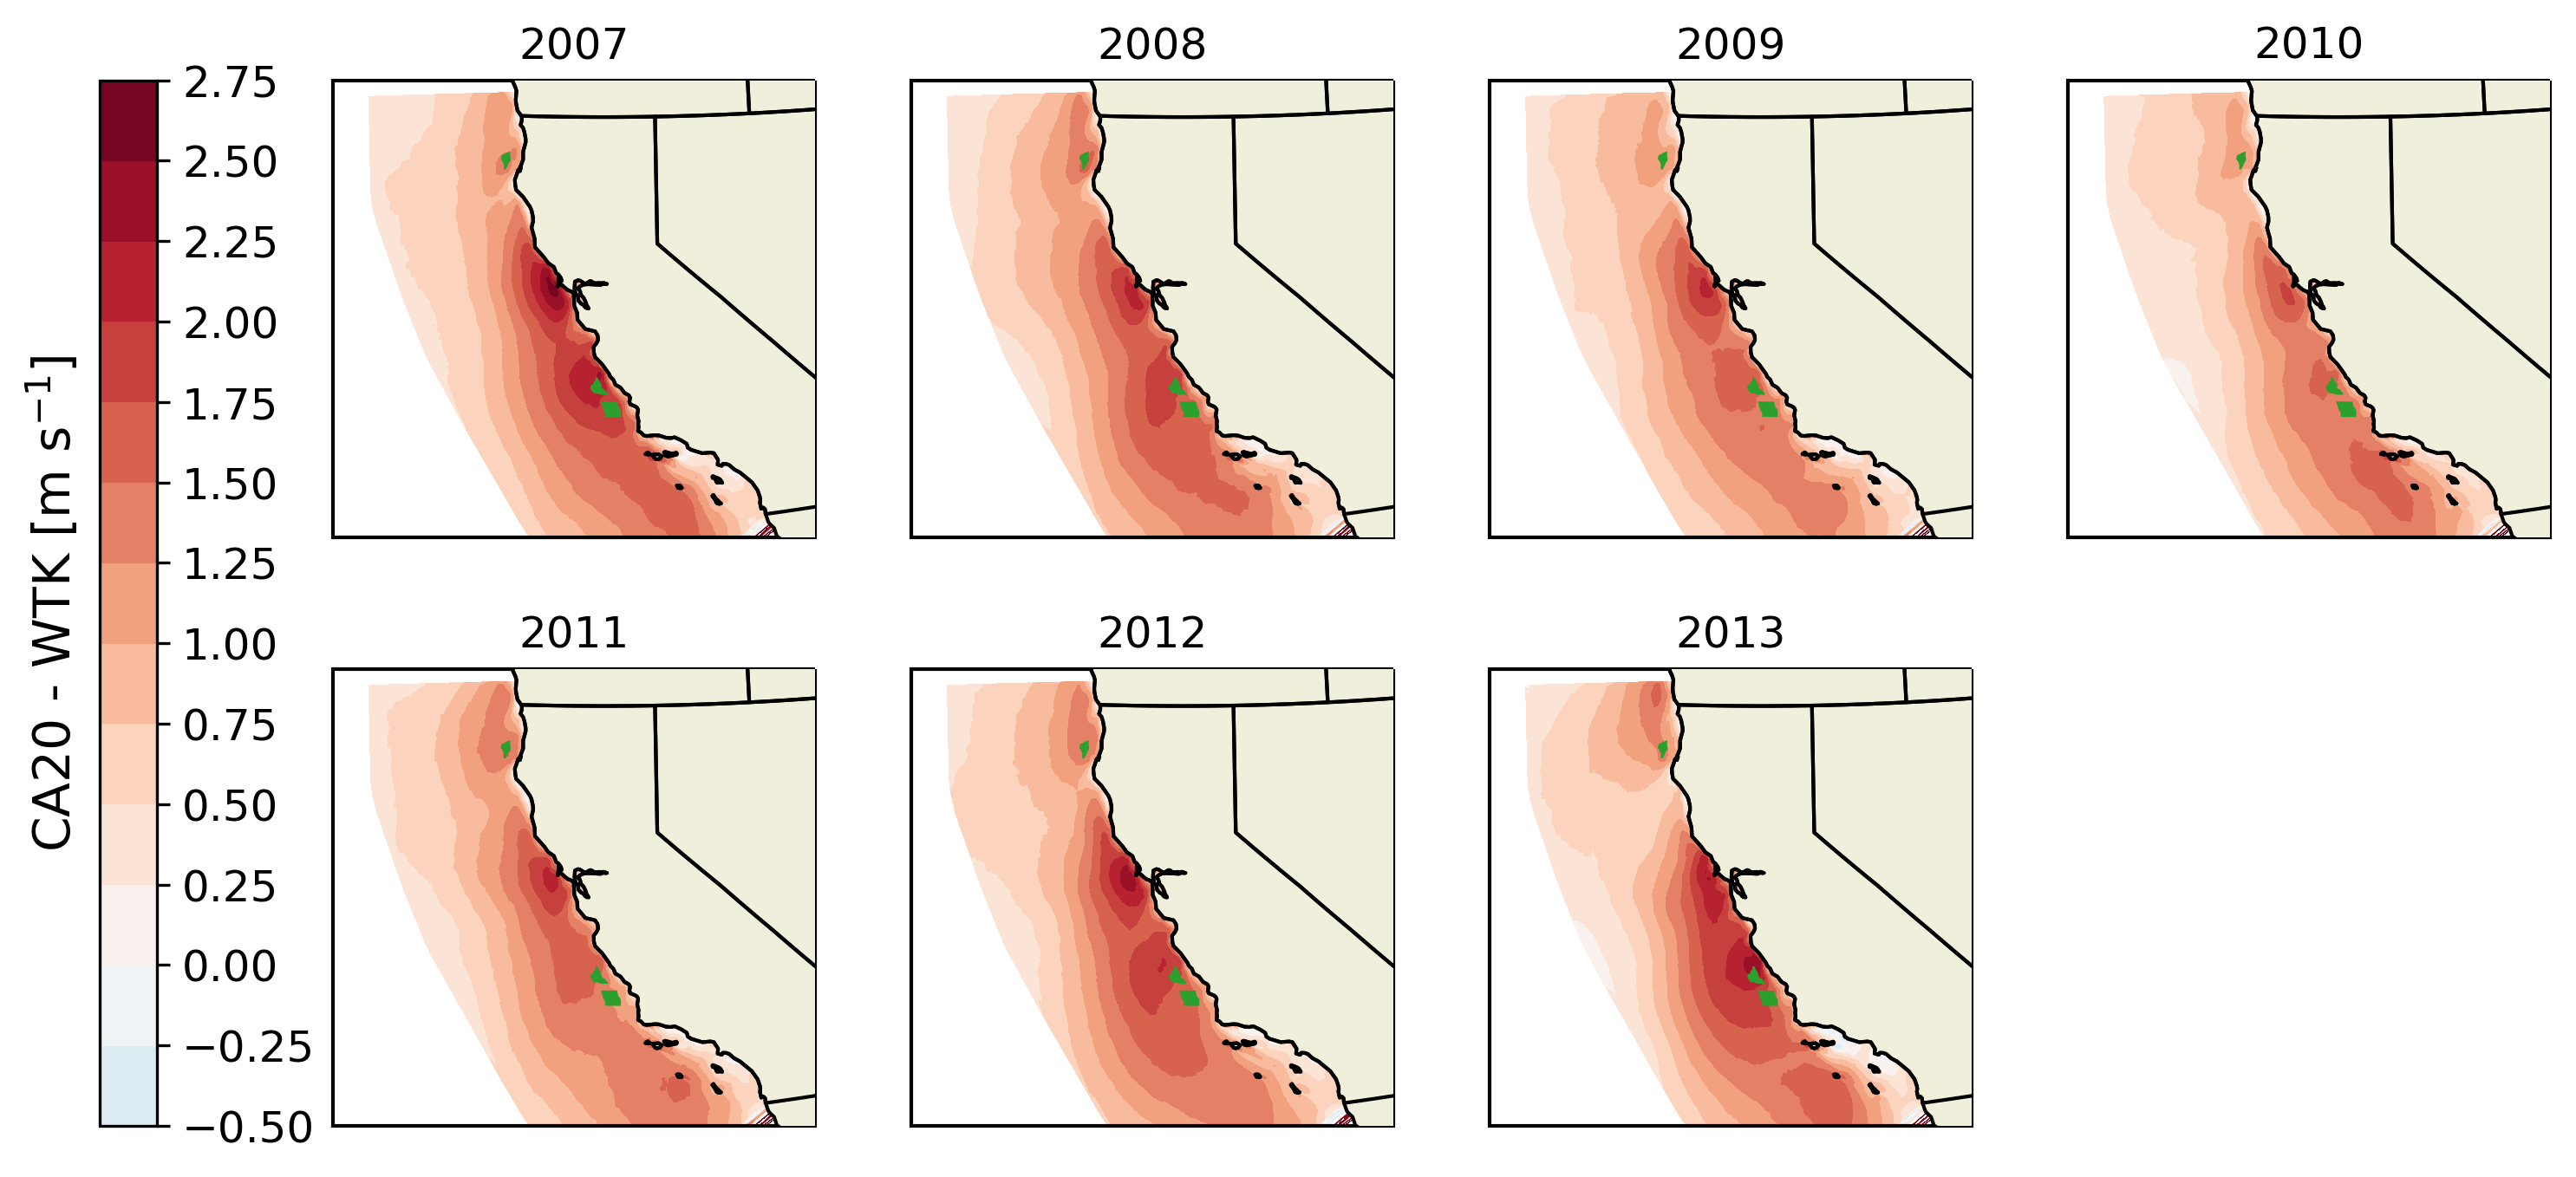

In [8]:
### Plot hourly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(2, 4, figsize=(11, 5.5), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-0.5, 2.75, 14)

im1 = ax[0,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['2007'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-2.75, vmax=2.75))
im = ax[0,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['2008'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-2.75, vmax=2.75))
im = ax[0,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['2009'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-2.75, vmax=2.75))
im = ax[0,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['2010'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-2.75, vmax=2.75))
im = ax[1,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['2011'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-2.75, vmax=2.75))
im = ax[1,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['2012'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-2.75, vmax=2.75))
im = ax[1,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['2013'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-2.75, vmax=2.75))
ax[-1, -1].set_visible(False)

# Colorbar
cax = fig.add_axes([ax[1,0].get_position().x1-0.25,ax[1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[1,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('CA20 - WTK [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("2007")
ax[0,1].set_title("2008")
ax[0,2].set_title("2009")
ax[0,3].set_title("2010")
ax[1,0].set_title("2011")
ax[1,1].set_title("2012")
ax[1,2].set_title("2013")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig23.png', bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlop

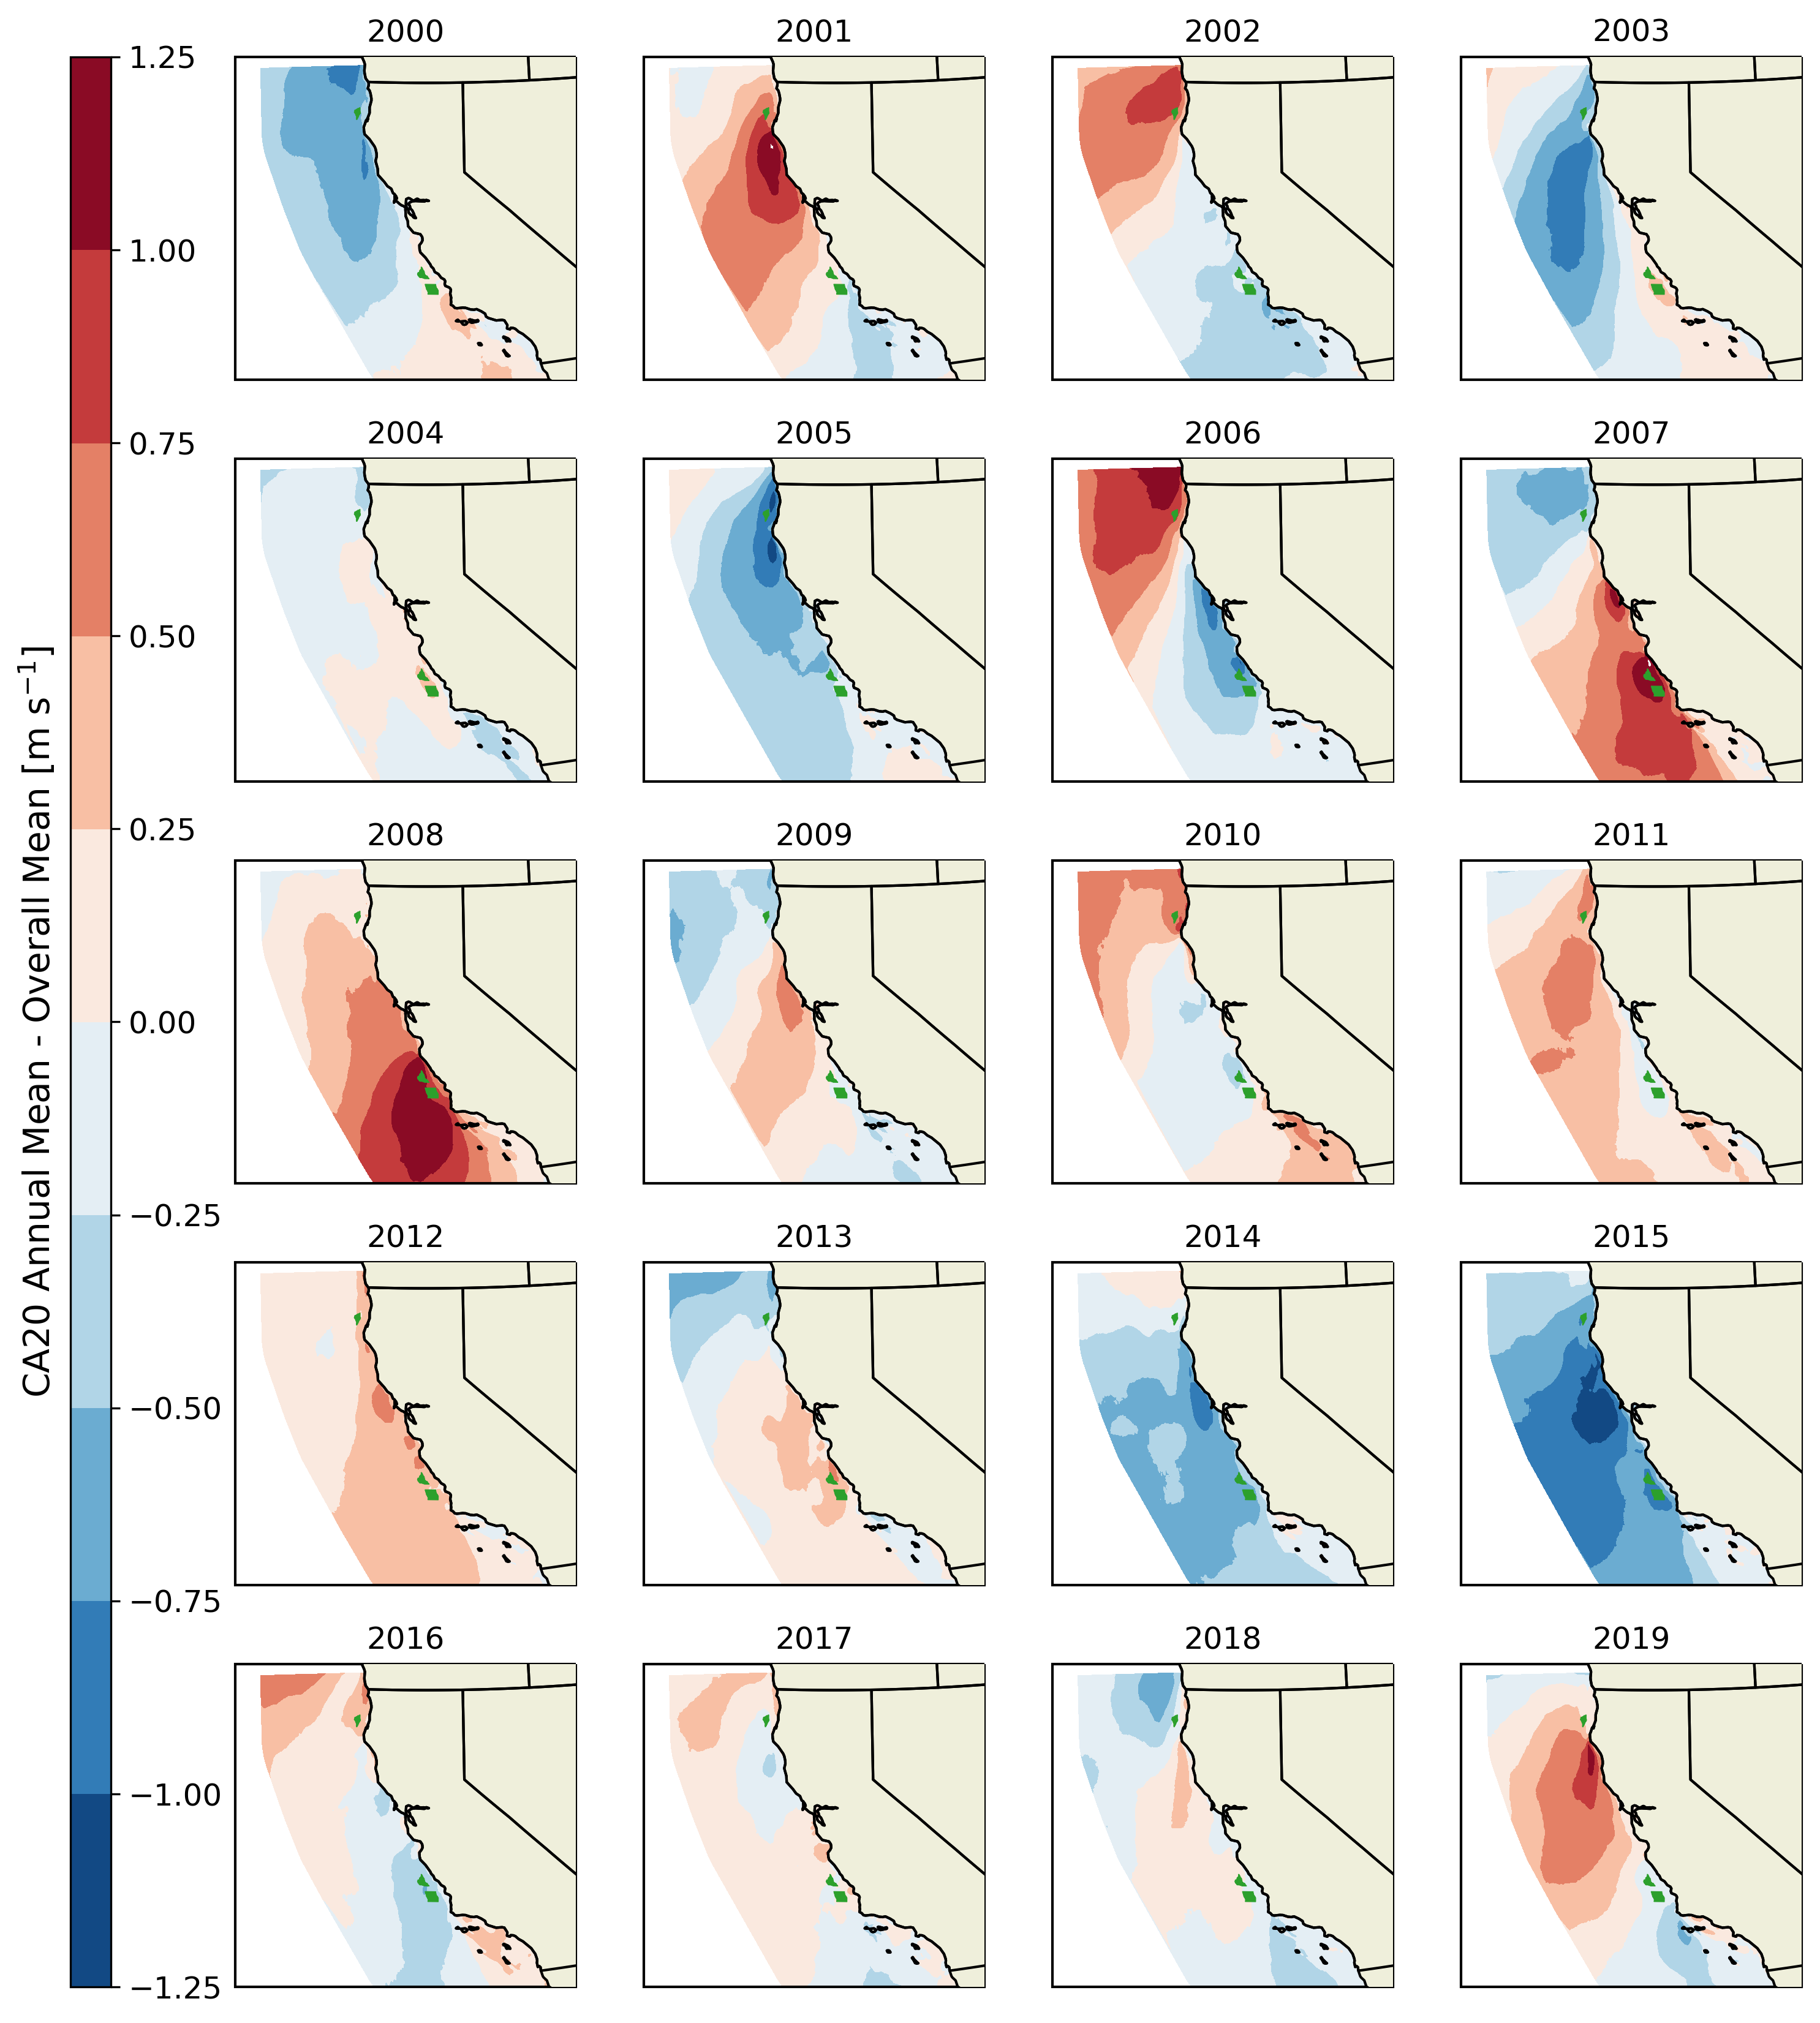

In [9]:
### Plot monthly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(5, 4, figsize=(11, 14), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-1.25, 1.25, 11)

im1 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        boemy00-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        boemy01-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        boemy02-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,3].tricontourf(long_vec,
                        lat_vec,
                        boemy03-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        boemy04-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        boemy05-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        boemy06-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,3].tricontourf(long_vec,
                        lat_vec,
                        boemy07-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,0].tricontourf(long_vec,
                        lat_vec,
                        boemy08-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,1].tricontourf(long_vec,
                        lat_vec,
                        boemy09-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,2].tricontourf(long_vec,
                        lat_vec,
                        boemy10-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,3].tricontourf(long_vec,
                        lat_vec,
                        boemy11-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[3,0].tricontourf(long_vec,
                        lat_vec,
                        boemy12-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[3,1].tricontourf(long_vec,
                        lat_vec,
                        boemy13-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[3,2].tricontourf(long_vec,
                        lat_vec,
                        boemy14-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[3,3].tricontourf(long_vec,
                        lat_vec,
                        boemy15-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[4,0].tricontourf(long_vec,
                        lat_vec,
                        boemy16-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[4,1].tricontourf(long_vec,
                        lat_vec,
                        boemy17-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[4,2].tricontourf(long_vec,
                        lat_vec,
                        boemy18-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[4,3].tricontourf(long_vec,
                        lat_vec,
                        boemy19-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))


# Colorbar
cax = fig.add_axes([ax[-1,0].get_position().x1-0.25,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('CA20 Annual Mean - Overall Mean [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("2000")
ax[0,1].set_title("2001")
ax[0,2].set_title("2002")
ax[0,3].set_title("2003")
ax[1,0].set_title("2004")
ax[1,1].set_title("2005")
ax[1,2].set_title("2006")
ax[1,3].set_title("2007")
ax[2,0].set_title("2008")
ax[2,1].set_title("2009")
ax[2,2].set_title("2010")
ax[2,3].set_title("2011")
ax[3,0].set_title("2012")
ax[3,1].set_title("2013")
ax[3,2].set_title("2014")
ax[3,3].set_title("2015")
ax[4,0].set_title("2016")
ax[4,1].set_title("2017")
ax[4,2].set_title("2018")
ax[4,3].set_title("2019")


## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')


# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[3,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[3,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[3,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[3,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[4,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[4,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[4,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[4,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# # plt.savefig('../figures/fig18.png', bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNo

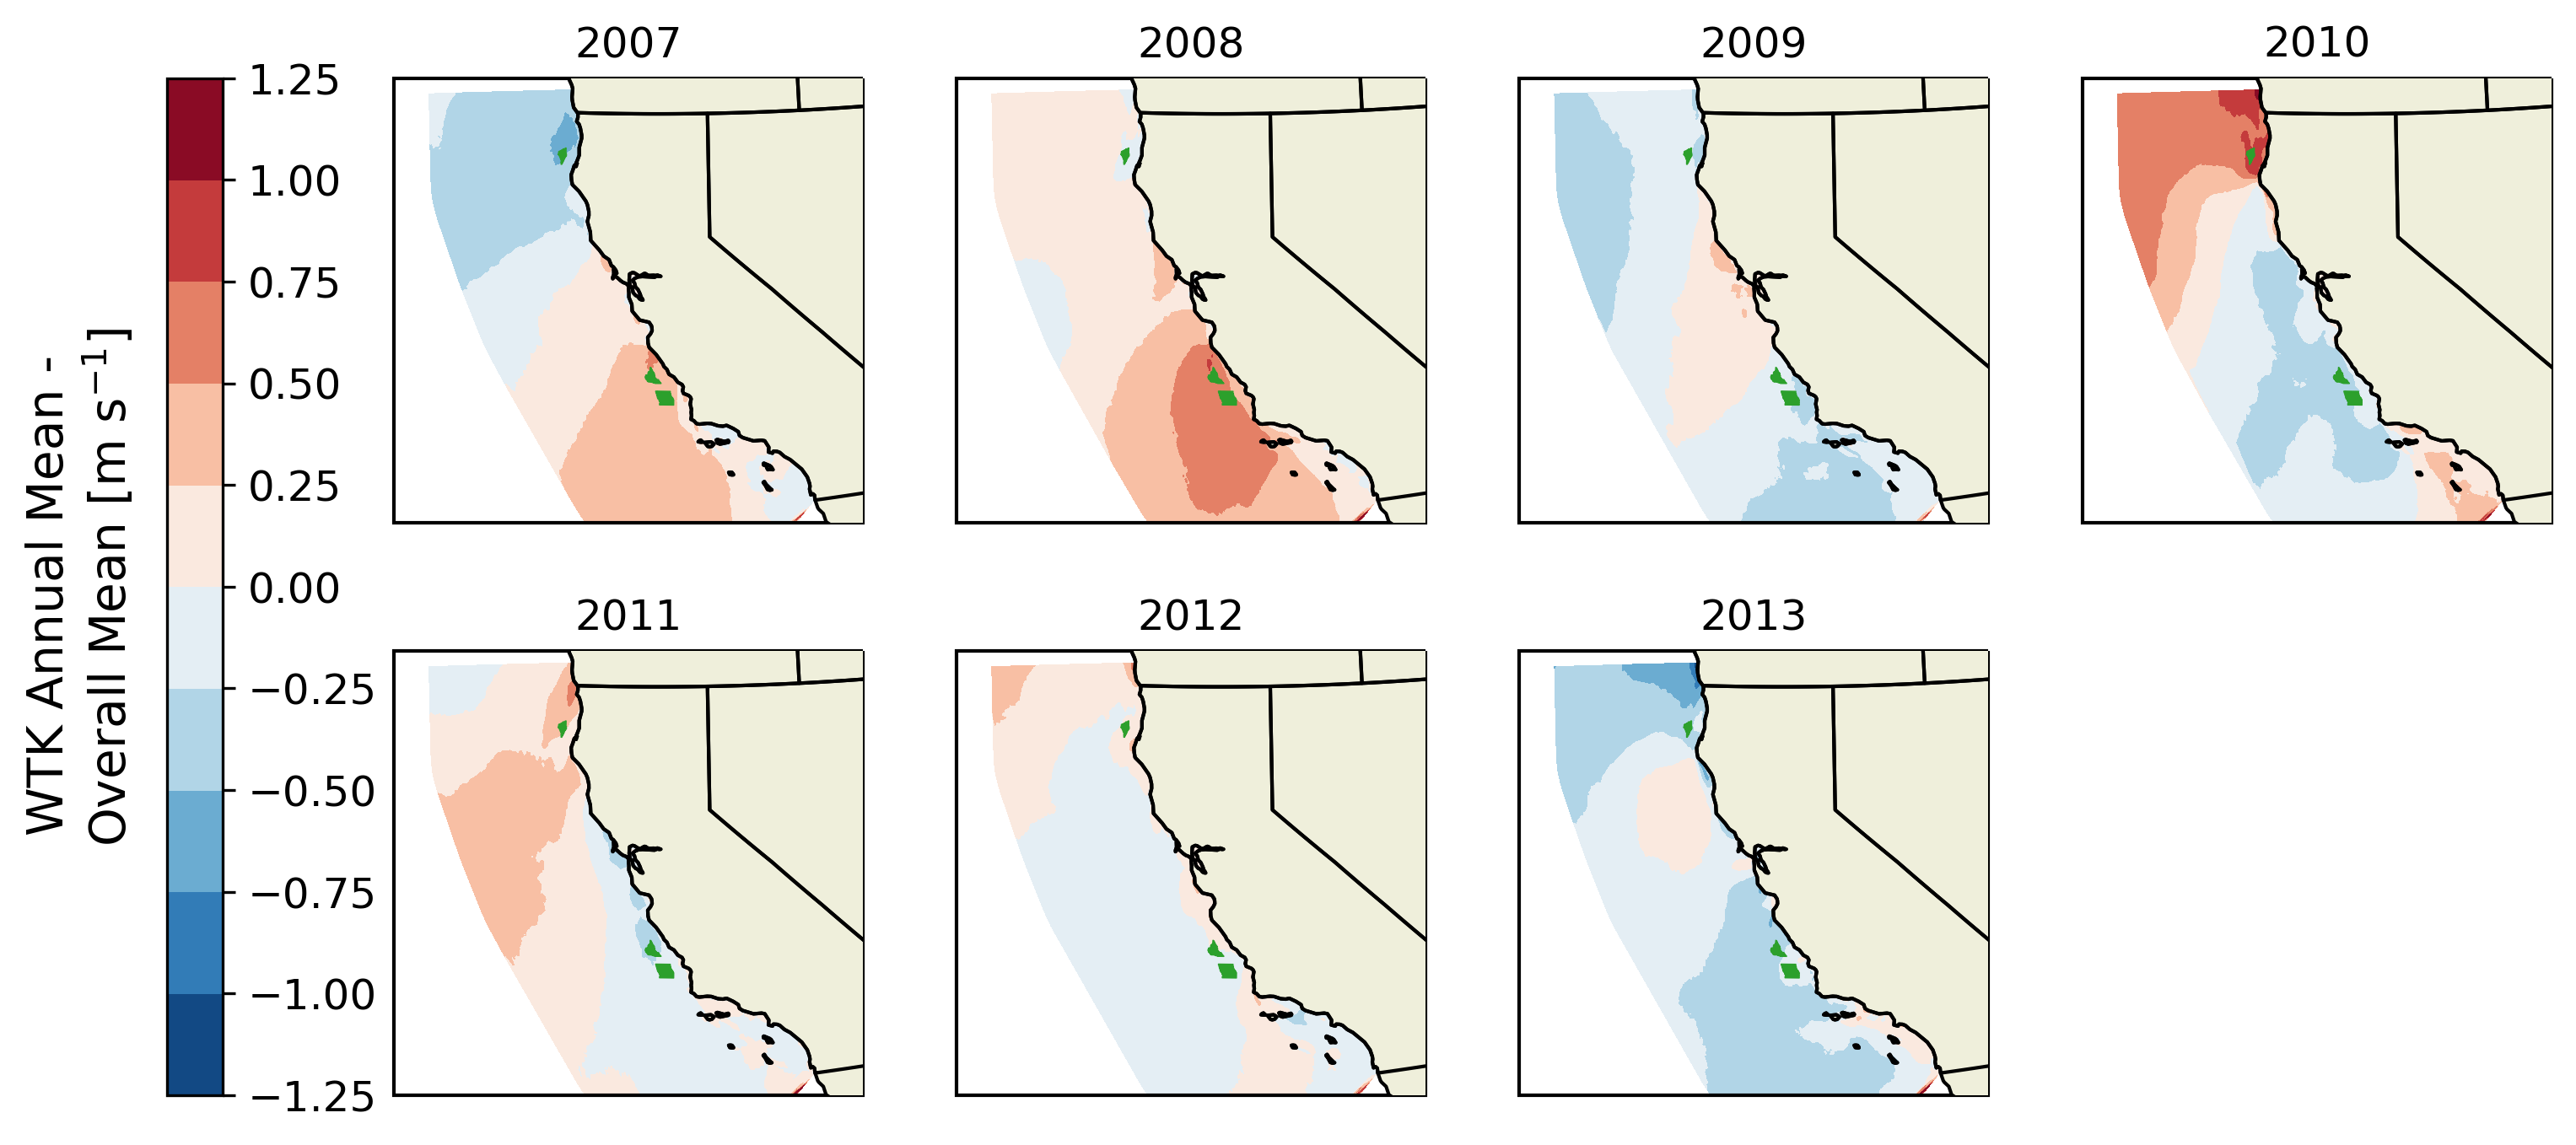

In [10]:
### Plot monthly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(2, 4, figsize=(11, 5.5), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-1.25, 1.25, 11)

diffy07 = wtky07.copy()
diffy07['Winds'] = wtky07['Winds']-wtk_full['Winds']
diffy07 = diffy07.dropna()

diffy08 = wtky08.copy()
diffy08['Winds'] = wtky08['Winds']-wtk_full['Winds']
diffy08 = diffy08.dropna()

diffy09 = wtky09.copy()
diffy09['Winds'] = wtky09['Winds']-wtk_full['Winds']
diffy09 = diffy09.dropna()

diffy10 = wtky10.copy()
diffy10['Winds'] = wtky10['Winds']-wtk_full['Winds']
diffy10 = diffy10.dropna()

diffy11 = wtky11.copy()
diffy11['Winds'] = wtky11['Winds']-wtk_full['Winds']
diffy11 = diffy11.dropna()

diffy12 = wtky12.copy()
diffy12['Winds'] = wtky12['Winds']-wtk_full['Winds']
diffy12 = diffy12.dropna()

diffy13 = wtky13.copy()
diffy13['Winds'] = wtky13['Winds']-wtk_full['Winds']
diffy13 = diffy13.dropna()

im1 = ax[0,0].tricontourf(diffy07['Long'],
                        diffy07['Lat'],
                        diffy07['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,1].tricontourf(diffy08['Long'],
                        diffy08['Lat'],
                        diffy08['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,2].tricontourf(diffy09['Long'],
                        diffy09['Lat'],
                        diffy09['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,3].tricontourf(diffy10['Long'],
                        diffy10['Lat'],
                        diffy10['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,0].tricontourf(diffy11['Long'],
                        diffy11['Lat'],
                        diffy11['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,1].tricontourf(diffy12['Long'],
                        diffy12['Lat'],
                        diffy12['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,2].tricontourf(diffy13['Long'],
                        diffy13['Lat'],
                        diffy13['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
ax[-1, -1].set_visible(False)


# Colorbar
cax = fig.add_axes([ax[-1,0].get_position().x1-0.25,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('WTK Annual Mean - \nOverall Mean [m s$^{-1}$]', fontsize=14, labelpad=-100)

# Subtitles
ax[0,0].set_title("2007")
ax[0,1].set_title("2008")
ax[0,2].set_title("2009")
ax[0,3].set_title("2010")
ax[1,0].set_title("2011")
ax[1,1].set_title("2012")
ax[1,2].set_title("2013")


## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')


# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig19.png', bbox_inches='tight')

plt.show()

# Monthly

### Regrid Data

In [11]:
# ### Interpolate WTK winds onto BOEM grid
# ## Load coords
# wtk_coords = np.loadtxt('data/wtk/coordinates.csv', delimiter=',')
# boem_coords = np.loadtxt('data/boem20/coordinates.csv')
# n_coords_boem = boem_coords.shape[0]

# ## Load one temporally averaged dataset
# # for i in range(1,13):
# for i in range(0,24):
#     print("Regridding month", i)
#     wtk_winds_raw = np.loadtxt('data/wtk/month_'+str(i).zfill(2)+'.csv')
#     wtk_winds_interp = interpolate.griddata(wtk_coords,
#                               wtk_winds_raw, boem_coords, method='cubic')
    
#     winds_wtk_interp_df = np.vstack((wtk_winds_interp, boem_coords.T))
#     winds_wtk_interp_df = pd.DataFrame(winds_wtk_interp_df.T, columns=['Winds', 'Lat', 'Long'])
    
#     winds_wtk_interp_df.to_csv('data/wtk/month_'+str(i).zfill(2)+'_interp2boem.csv', index=False)

### Load Data

In [12]:
### Read data
## Load monthly data
# WTK
wtkm01 = pd.read_csv('data/wtk/month_01_interp2ca.csv')
wtkm02 = pd.read_csv('data/wtk/month_02_interp2ca.csv')
wtkm03 = pd.read_csv('data/wtk/month_03_interp2ca.csv')
wtkm04 = pd.read_csv('data/wtk/month_04_interp2ca.csv')
wtkm05 = pd.read_csv('data/wtk/month_05_interp2ca.csv')
wtkm06 = pd.read_csv('data/wtk/month_06_interp2ca.csv')
wtkm07 = pd.read_csv('data/wtk/month_07_interp2ca.csv')
wtkm08 = pd.read_csv('data/wtk/month_08_interp2ca.csv')
wtkm09 = pd.read_csv('data/wtk/month_09_interp2ca.csv')
wtkm10 = pd.read_csv('data/wtk/month_10_interp2ca.csv')
wtkm11 = pd.read_csv('data/wtk/month_11_interp2ca.csv')
wtkm12 = pd.read_csv('data/wtk/month_12_interp2ca.csv')

wtkm01['Winds'] /= 100
wtkm02['Winds'] /= 100
wtkm03['Winds'] /= 100
wtkm04['Winds'] /= 100
wtkm05['Winds'] /= 100
wtkm06['Winds'] /= 100
wtkm07['Winds'] /= 100
wtkm08['Winds'] /= 100
wtkm09['Winds'] /= 100
wtkm10['Winds'] /= 100
wtkm11['Winds'] /= 100
wtkm12['Winds'] /= 100

# BOEM
boemm01 = np.loadtxt('data/ca20/month_01.csv')
boemm02 = np.loadtxt('data/ca20/month_02.csv')
boemm03 = np.loadtxt('data/ca20/month_03.csv')
boemm04 = np.loadtxt('data/ca20/month_04.csv')
boemm05 = np.loadtxt('data/ca20/month_05.csv')
boemm06 = np.loadtxt('data/ca20/month_06.csv')
boemm07 = np.loadtxt('data/ca20/month_07.csv')
boemm08 = np.loadtxt('data/ca20/month_08.csv')
boemm09 = np.loadtxt('data/ca20/month_09.csv')
boemm10 = np.loadtxt('data/ca20/month_10.csv')
boemm11 = np.loadtxt('data/ca20/month_11.csv')
boemm12 = np.loadtxt('data/ca20/month_12.csv')

boemm01 /= 100
boemm02 /= 100
boemm03 /= 100
boemm04 /= 100
boemm05 /= 100
boemm06 /= 100
boemm07 /= 100
boemm08 /= 100
boemm09 /= 100
boemm10 /= 100
boemm11 /= 100
boemm12 /= 100

coords = np.loadtxt('data/ca20/coordinates_ca20.csv')

In [13]:
### Calculate lat/long info for the map
lat_vec = coords[:,0]
long_vec = coords[:,1]

LAT_MIN = lat_vec.min()
LAT_MAX = lat_vec.max()
LAT_MEAN = lat_vec.mean()
LONG_MIN = long_vec.min()
LONG_MAX = long_vec.max()
LONG_MEAN = long_vec.mean()
MAP_BOUNDS = [LONG_MIN, LONG_MAX, LAT_MIN, LAT_MAX]

In [14]:
### Establish higher res cartopy data
# import cartopy
# print(cartopy.config['data_dir'])

coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m')
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')

states_50m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes', '50m')

In [15]:
### Process shapefiles for lease regions
## Load shapefiles
df = gpd.read_file('data/shapefiles/CA_Call_Areas_2018_09_26.shp')

## Convert projection to match what we use in Cartopy
crs = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
crs_proj4 = crs.proj4_init
df_proj = df.to_crs(crs_proj4)

## Merge (aka dissolve) geometries by lease area
df_proj_group = df_proj.dissolve(by='AREA_NM')

In [16]:
### Calculate difference and cleanup NaNs
## Set up dataframe
pd_diff = np.zeros((len(boemm01), 14))
cols = ['Lat', 'Long',
           'Jan', 'Feb', 'Mar',
           'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
pd_diff = pd.DataFrame(pd_diff, columns=cols)

## Populate wind differences
pd_diff['Lat'] = wtkm01['Lat']
pd_diff['Long'] = wtkm01['Long']
pd_diff['Jan'] = boemm01 - wtkm01['Winds']
pd_diff['Feb'] = boemm02 - wtkm02['Winds']
pd_diff['Mar'] = boemm03 - wtkm03['Winds']
pd_diff['Apr'] = boemm04 - wtkm04['Winds']
pd_diff['May'] = boemm05 - wtkm05['Winds']
pd_diff['Jun'] = boemm06 - wtkm06['Winds']
pd_diff['Jul'] = boemm07 - wtkm07['Winds']
pd_diff['Aug'] = boemm08 - wtkm08['Winds']
pd_diff['Sep'] = boemm09 - wtkm09['Winds']
pd_diff['Oct'] = boemm10 - wtkm10['Winds']
pd_diff['Nov'] = boemm11 - wtkm11['Winds']
pd_diff['Dec'] = boemm12 - wtkm12['Winds']

## Drop NaNs
pd_diff = pd_diff.dropna()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlop

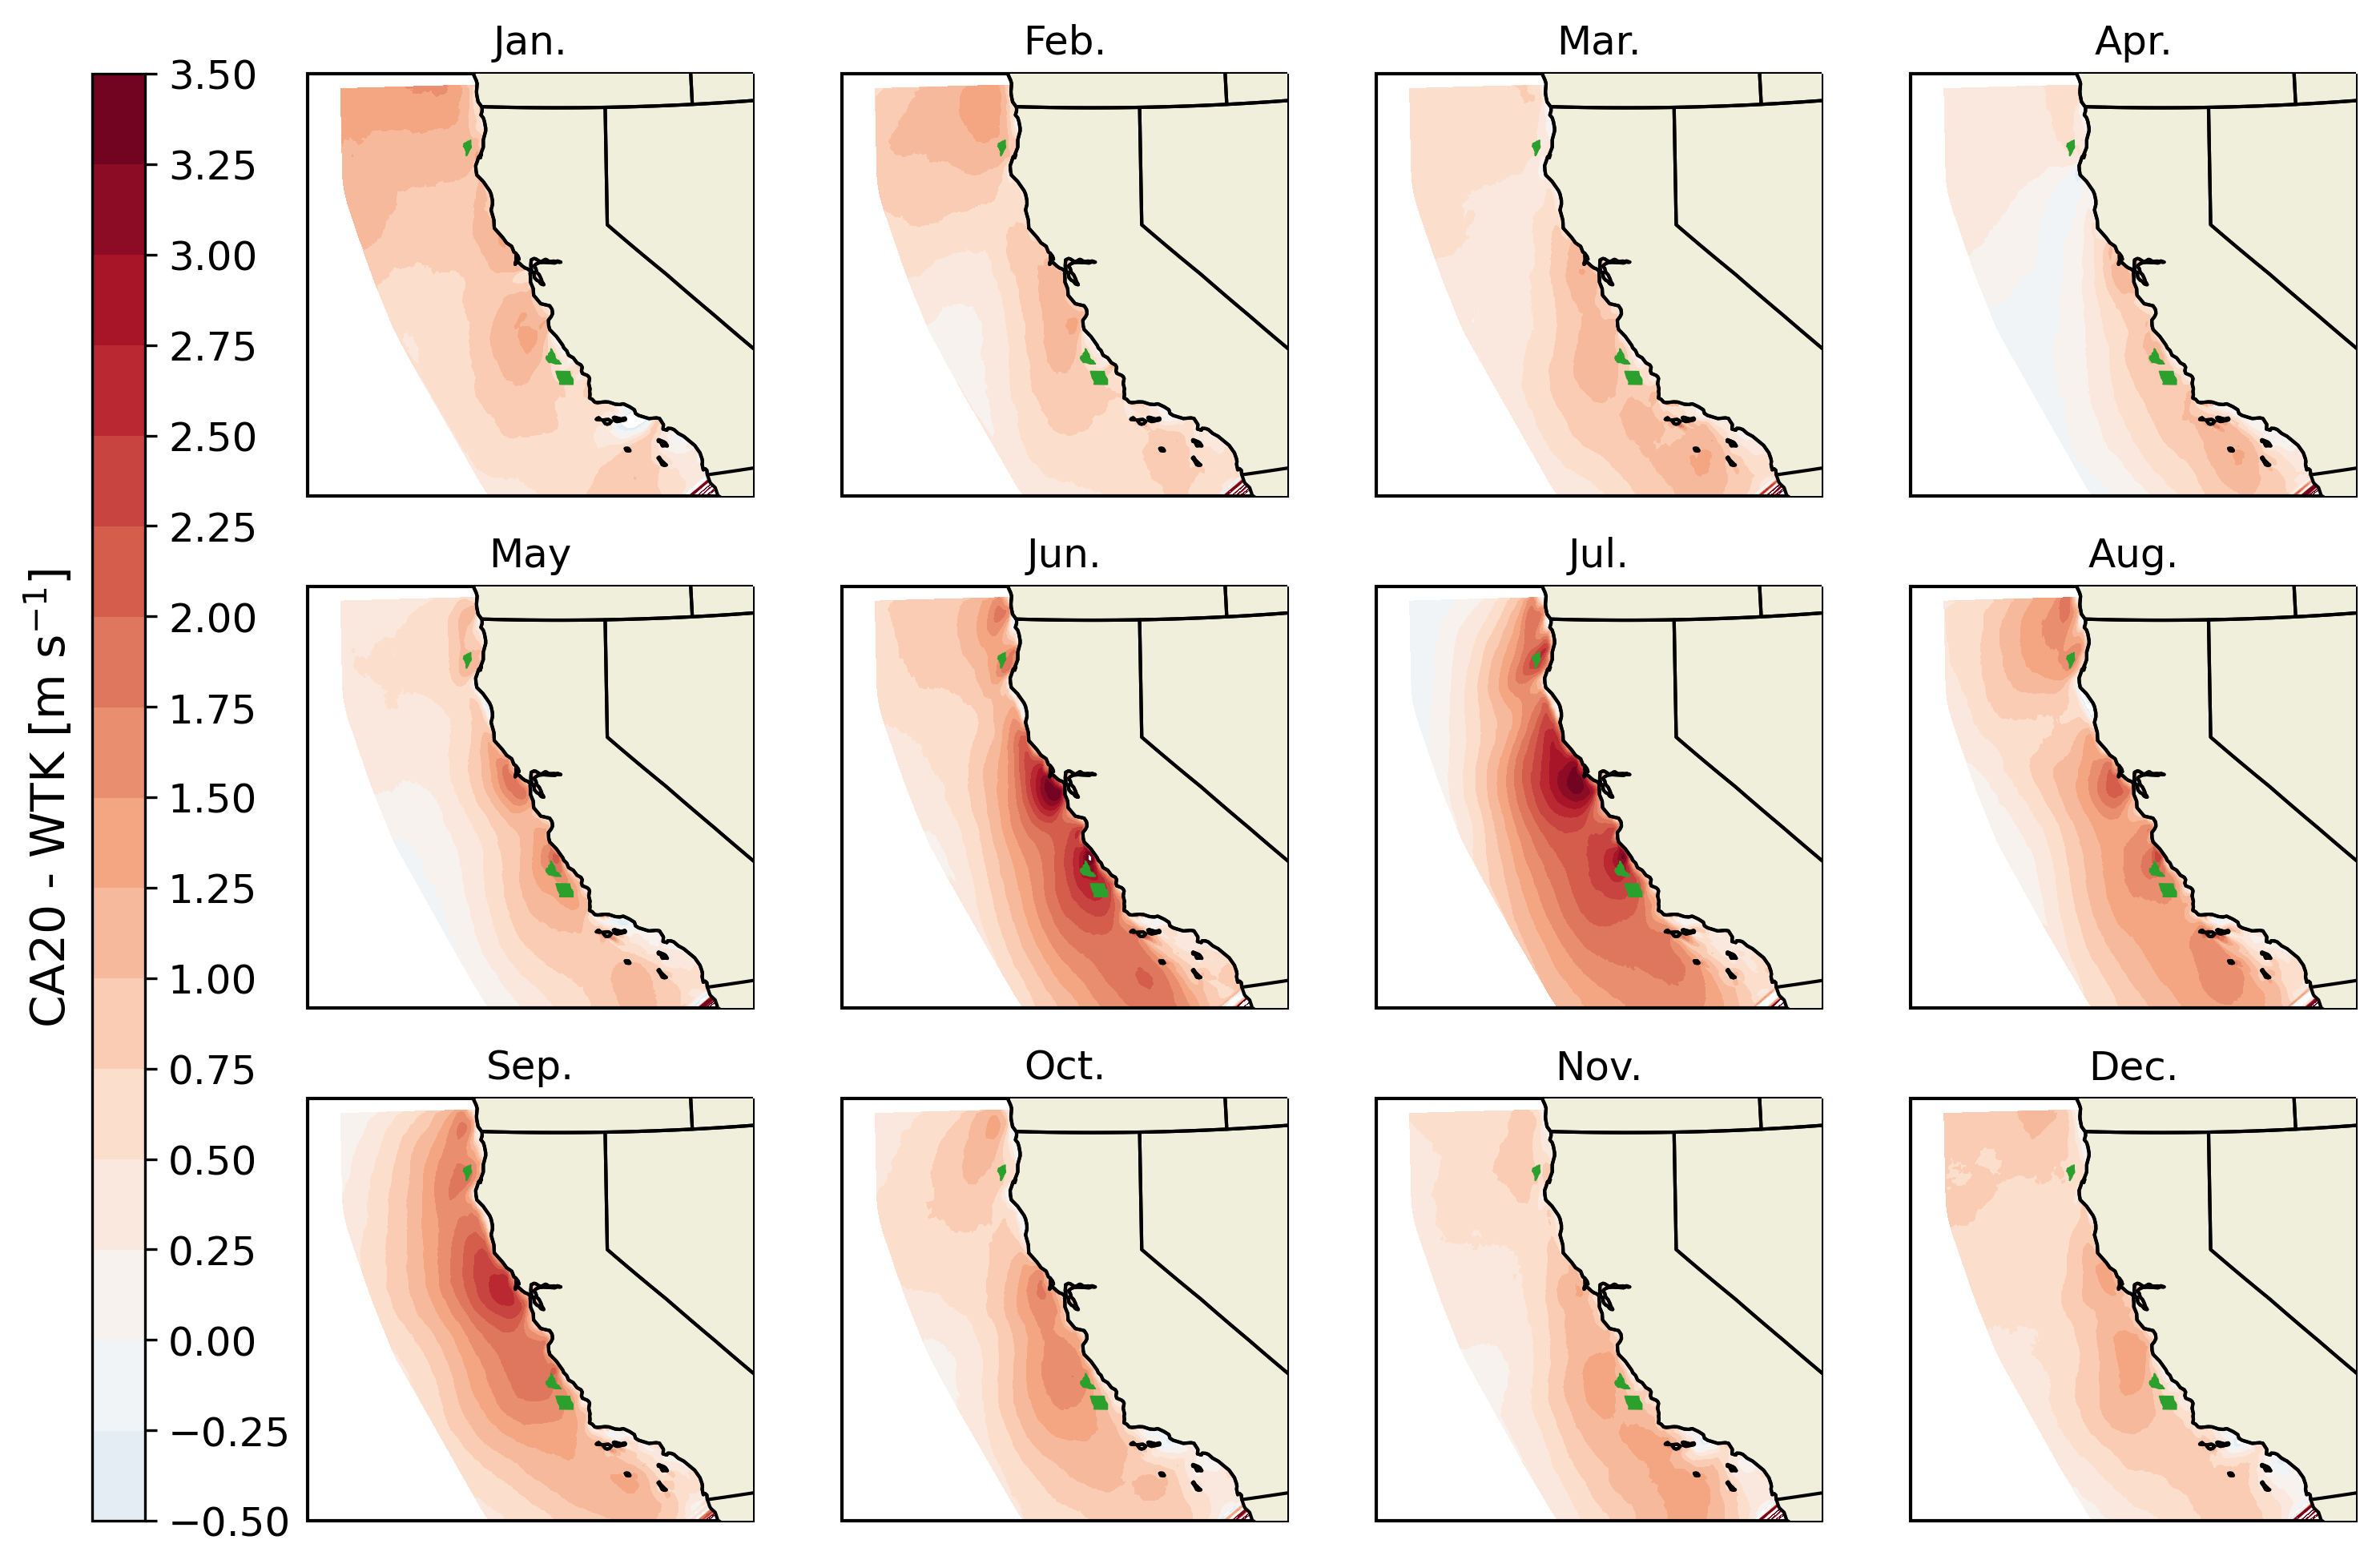

In [17]:
### Plot monthly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(3, 4, figsize=(11, 8), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-0.5, 3.5, 17)

im1 = ax[0,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Jan'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[0,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Feb'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[0,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Mar'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[0,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Apr'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[1,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['May'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[1,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Jun'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[1,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Jul'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[1,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Aug'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[2,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Sep'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[2,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Oct'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[2,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Nov'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))
im = ax[2,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['Dec'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-3.5, vmax=3.5))


# Colorbar
cax = fig.add_axes([ax[2,0].get_position().x1-0.25,ax[2,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[2,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('CA20 - WTK [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("Jan.")
ax[0,1].set_title("Feb.")
ax[0,2].set_title("Mar.")
ax[0,3].set_title("Apr.")
ax[1,0].set_title("May")
ax[1,1].set_title("Jun.")
ax[1,2].set_title("Jul.")
ax[1,3].set_title("Aug.")
ax[2,0].set_title("Sep.")
ax[2,1].set_title("Oct.")
ax[2,2].set_title("Nov.")
ax[2,3].set_title("Dec.")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig05.png', bbox_inches='tight')

plt.show()

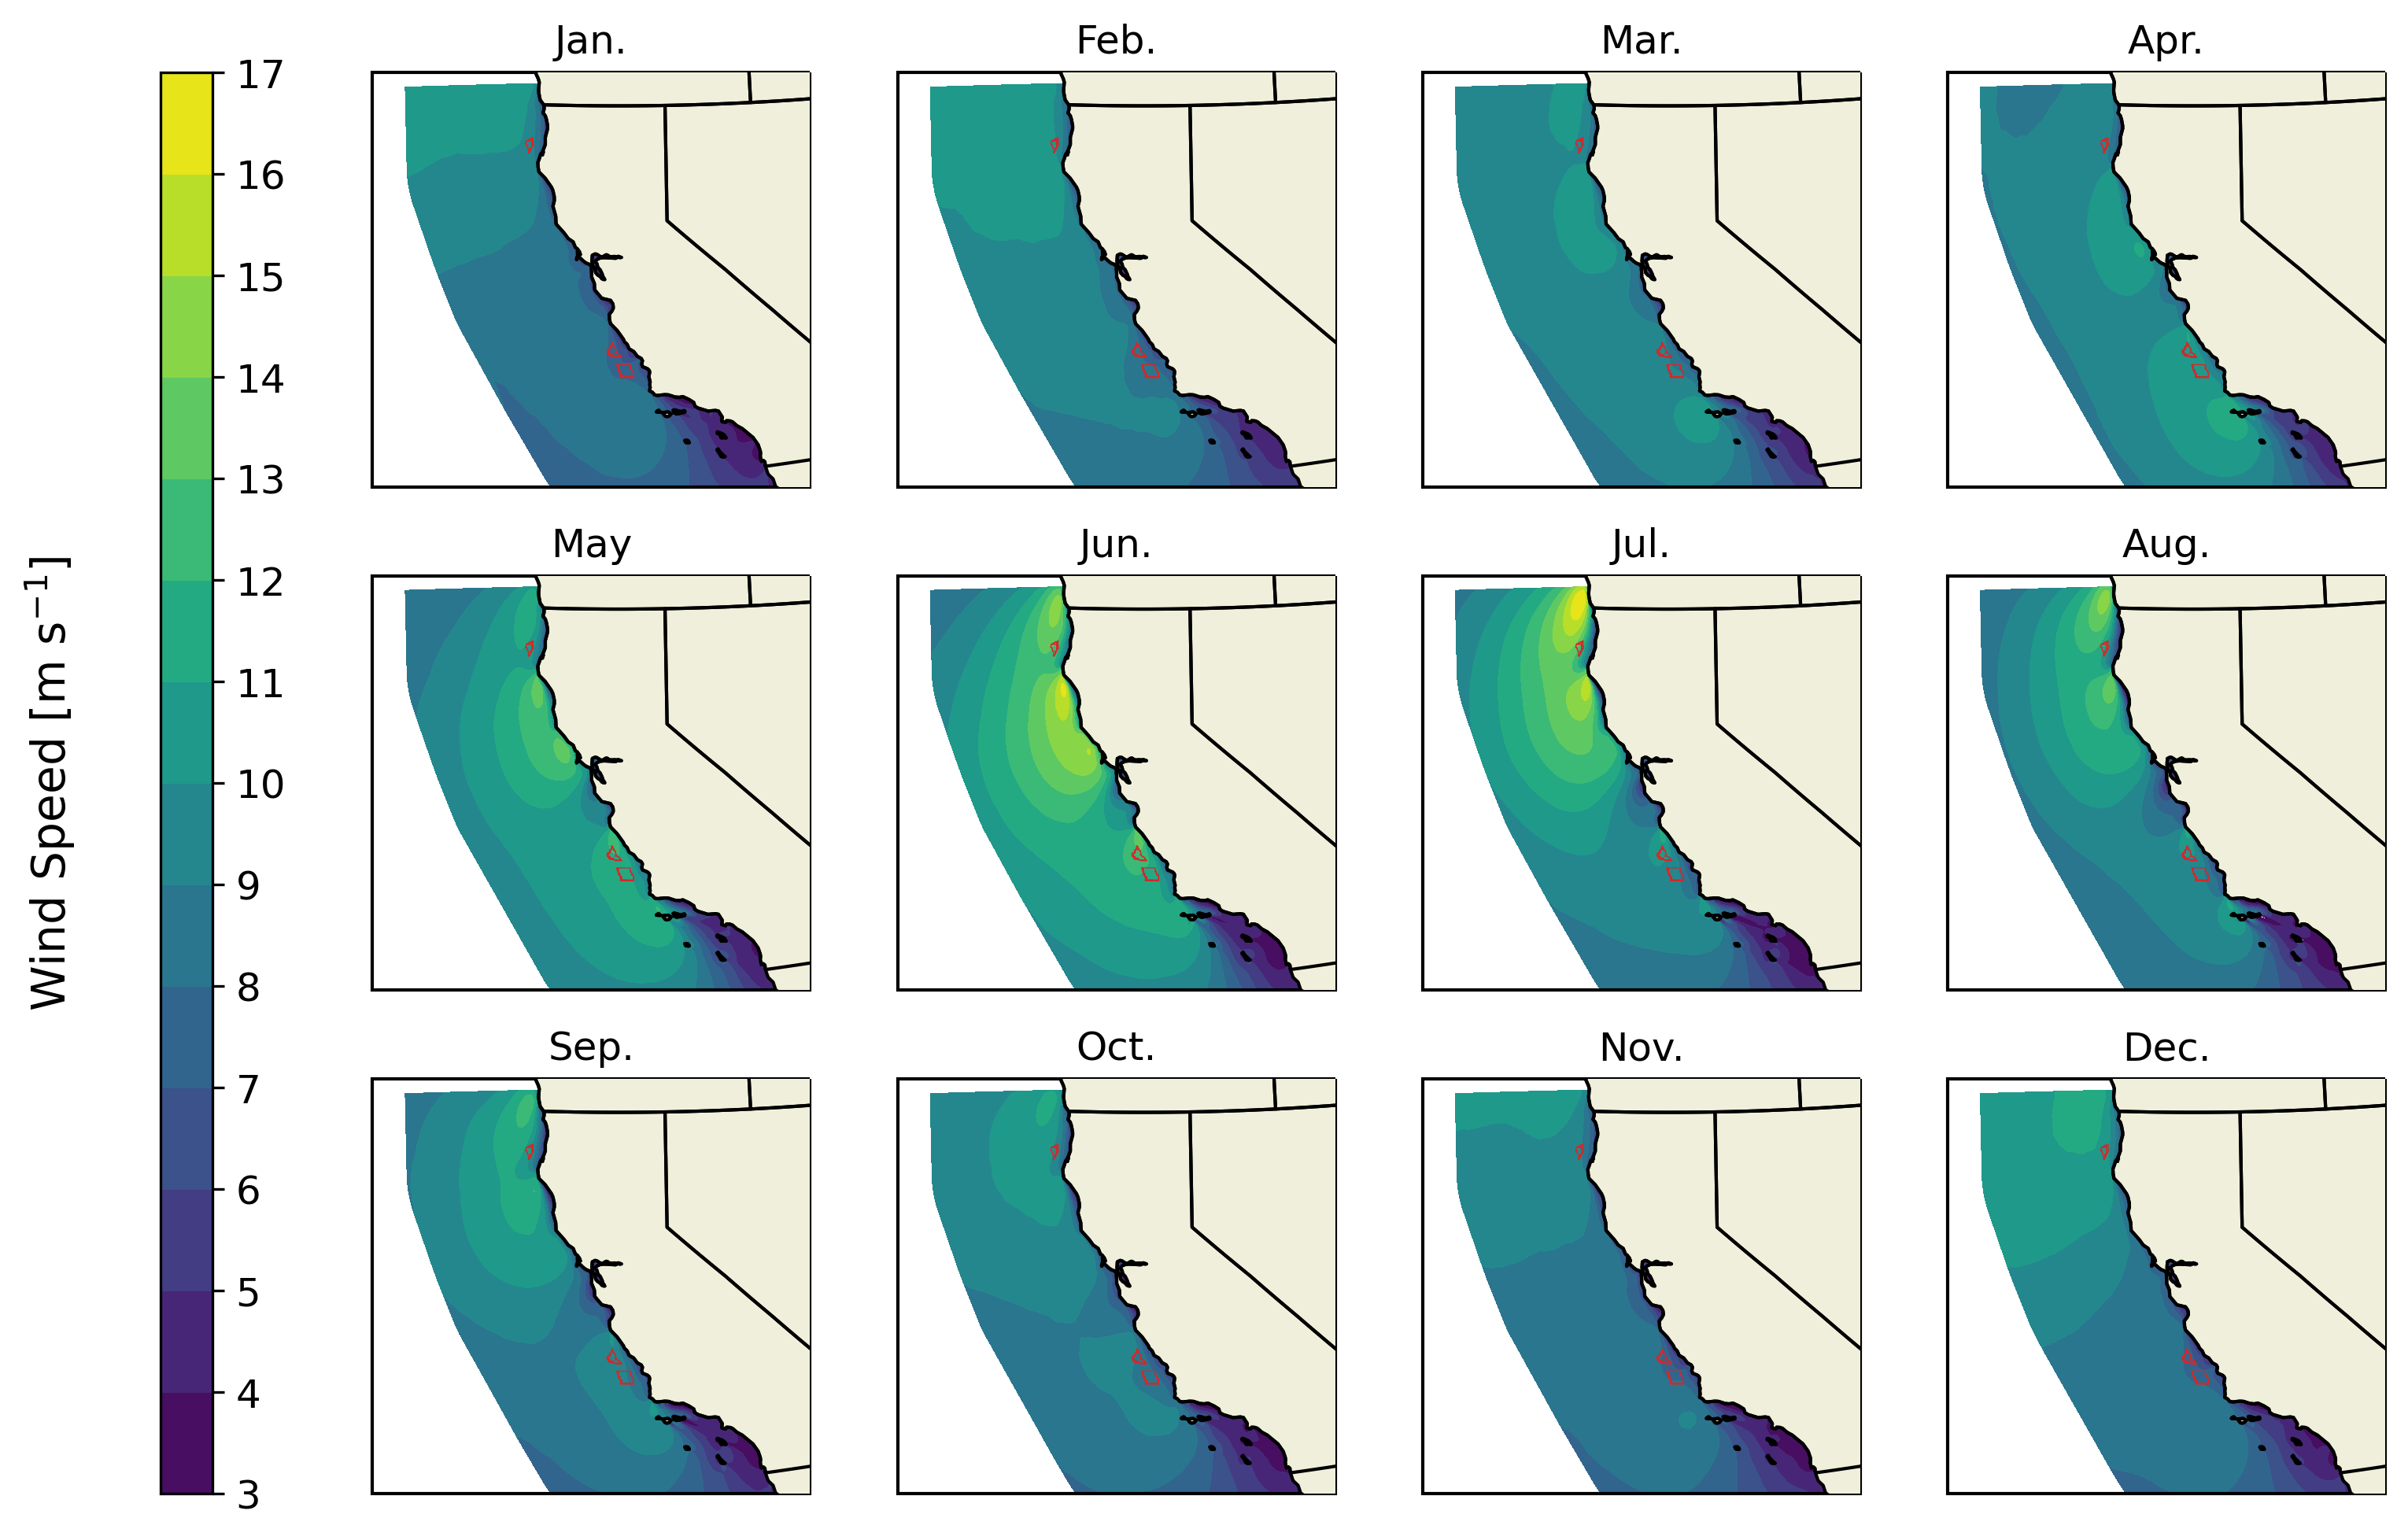

In [18]:
### Plot monthly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(3, 4, figsize=(11, 8), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_wind = np.linspace(3, 17, 15)

im1 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        boemm01,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        boemm02,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        boemm03,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,3].tricontourf(long_vec,
                        lat_vec,
                        boemm04,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        boemm05,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        boemm06,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        boemm07,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,3].tricontourf(long_vec,
                        lat_vec,
                        boemm08,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,0].tricontourf(long_vec,
                        lat_vec,
                        boemm09,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,1].tricontourf(long_vec,
                        lat_vec,
                        boemm10,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,2].tricontourf(long_vec,
                        lat_vec,
                        boemm11,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,3].tricontourf(long_vec,
                        lat_vec,
                        boemm12,
                        ticks_wind, transform=ccrs.Geodetic())


# Colorbar
cax = fig.add_axes([ax[2,0].get_position().x1-0.25,ax[2,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[2,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_wind)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('Wind Speed [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("Jan.")
ax[0,1].set_title("Feb.")
ax[0,2].set_title("Mar.")
ax[0,3].set_title("Apr.")
ax[1,0].set_title("May")
ax[1,1].set_title("Jun.")
ax[1,2].set_title("Jul.")
ax[1,3].set_title("Aug.")
ax[2,0].set_title("Sep.")
ax[2,1].set_title("Oct.")
ax[2,2].set_title("Nov.")
ax[2,3].set_title("Dec.")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)

# plt.savefig('../figures/boem_monthly.png', bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlop

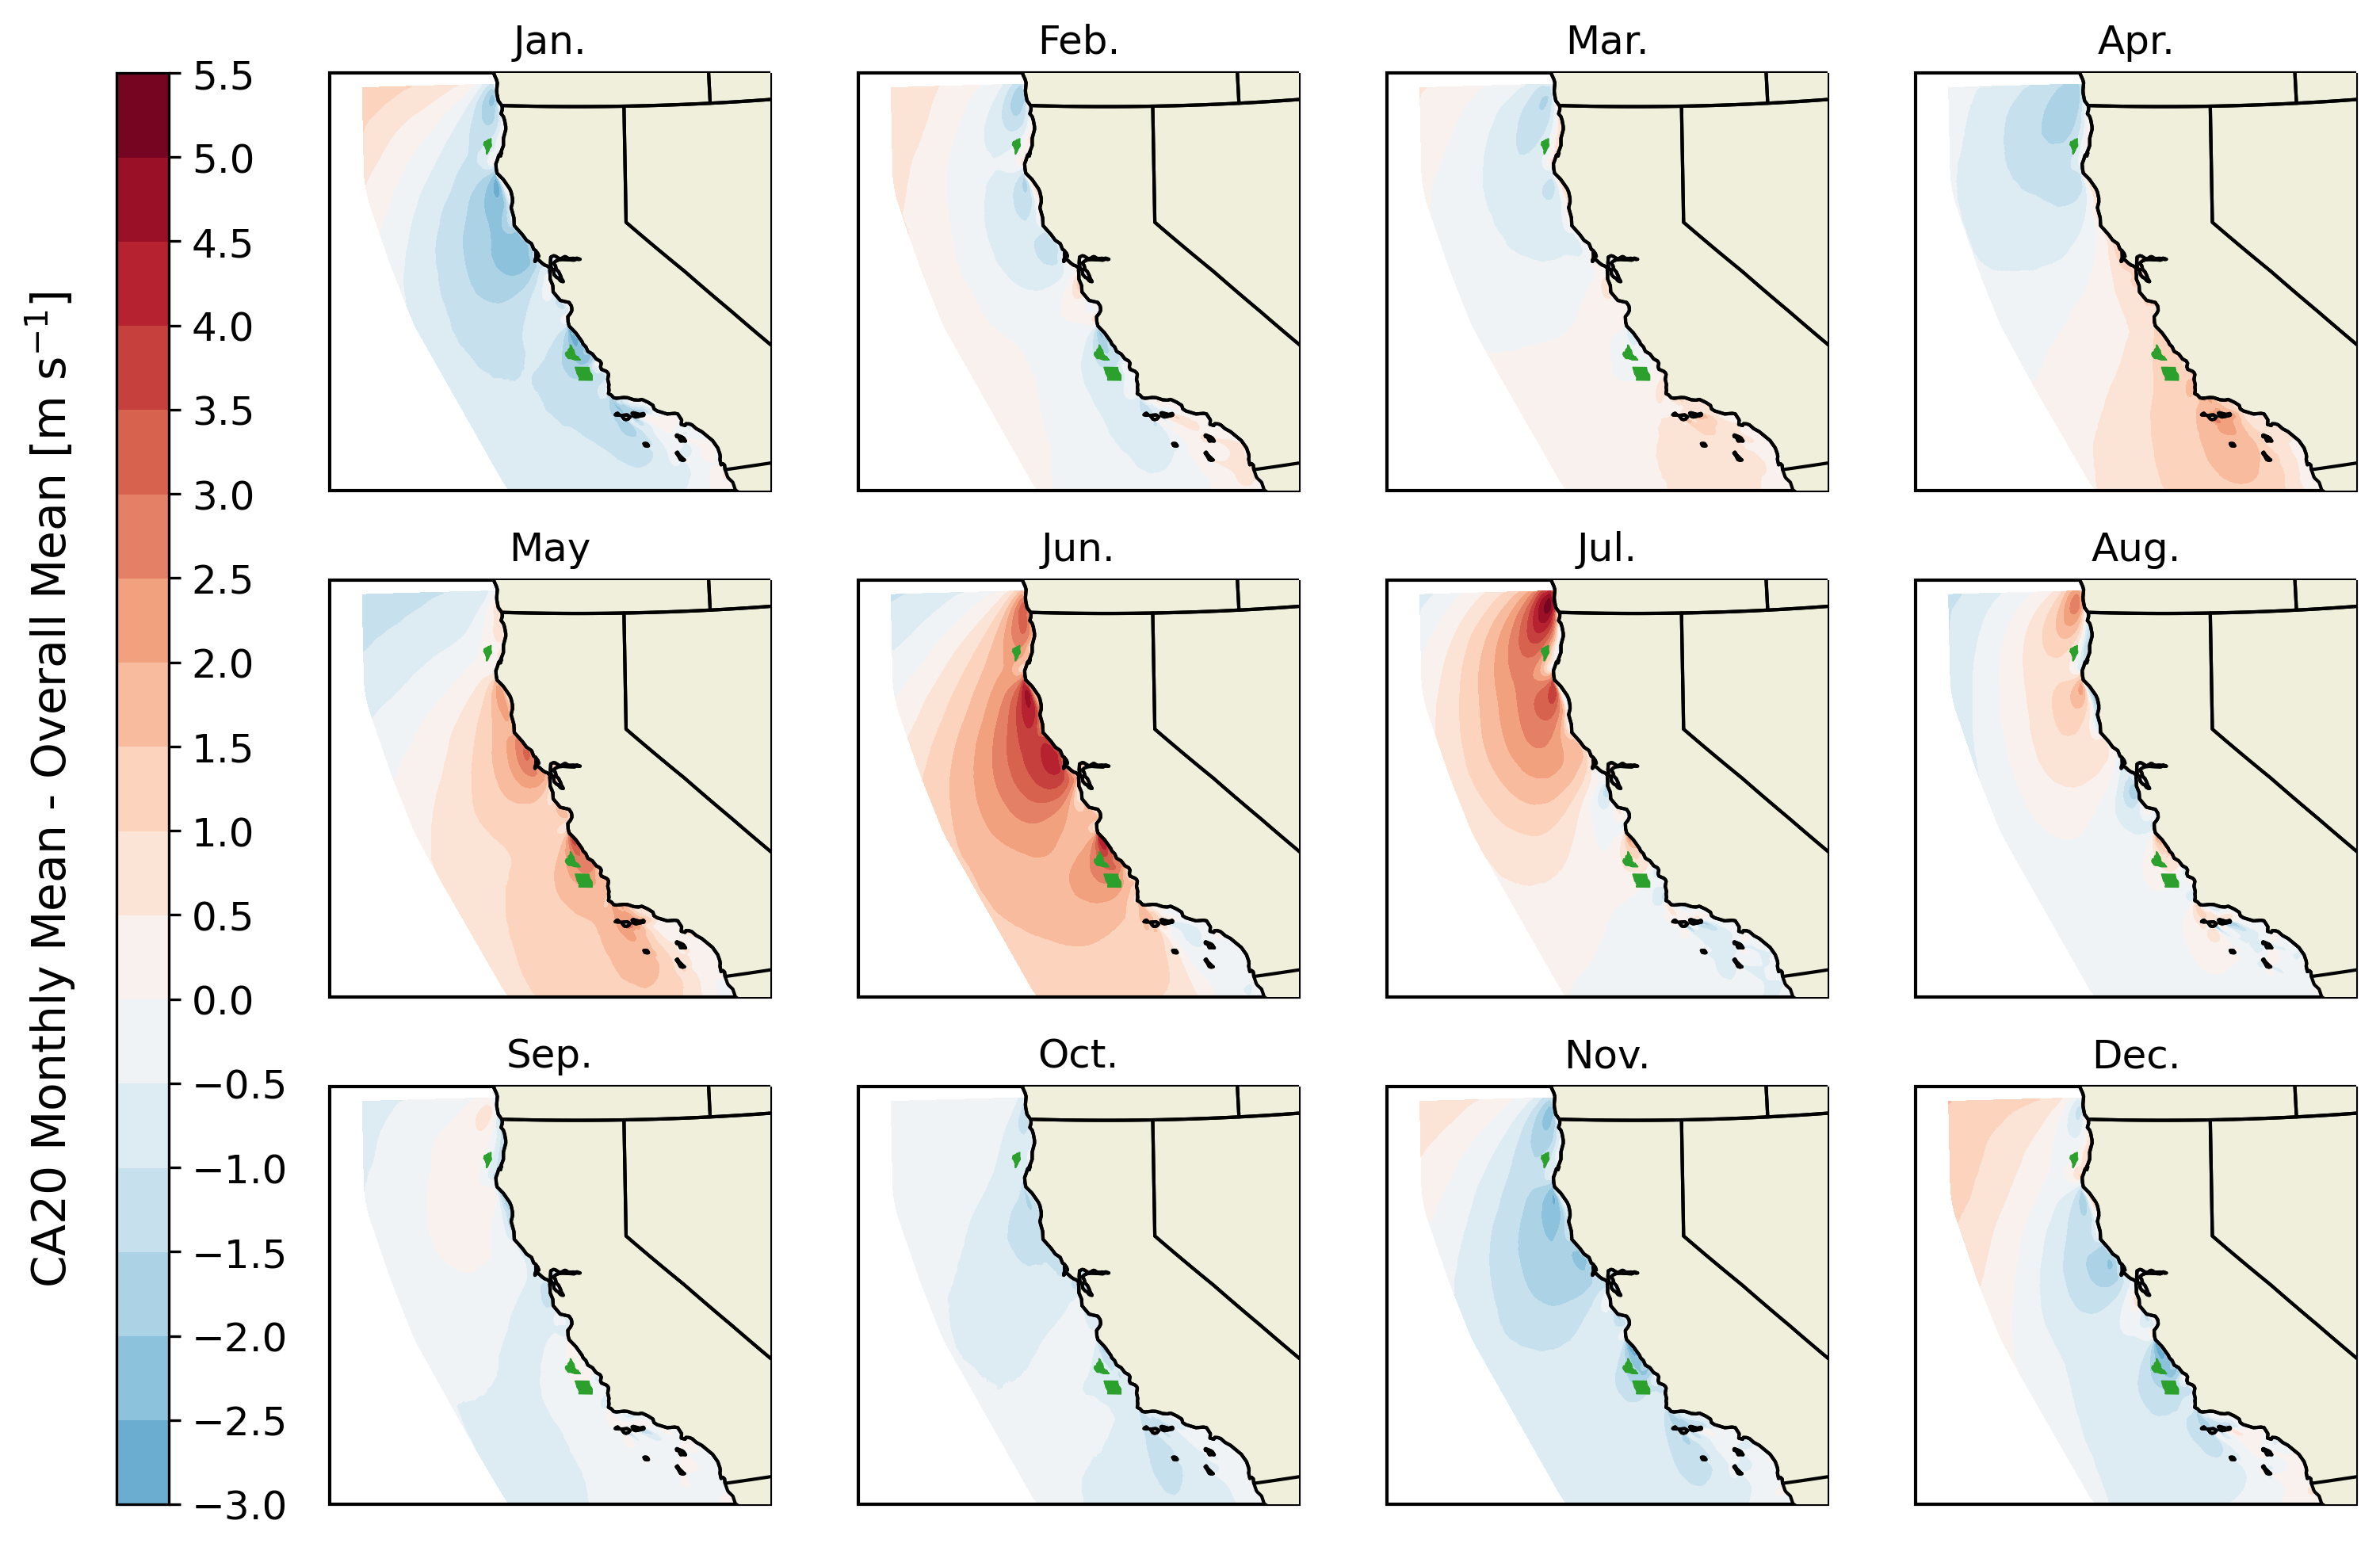

In [19]:
### Plot monthly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(3, 4, figsize=(11, 8), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-3, 5.5, 18)

im1 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        boemm01-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        boemm02-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        boemm03-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,3].tricontourf(long_vec,
                        lat_vec,
                        boemm04-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        boemm05-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        boemm06-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        boemm07-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,3].tricontourf(long_vec,
                        lat_vec,
                        boemm08-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,0].tricontourf(long_vec,
                        lat_vec,
                        boemm09-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,1].tricontourf(long_vec,
                        lat_vec,
                        boemm10-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,2].tricontourf(long_vec,
                        lat_vec,
                        boemm11-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,3].tricontourf(long_vec,
                        lat_vec,
                        boemm12-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))


# Colorbar
cax = fig.add_axes([ax[2,0].get_position().x1-0.25,ax[2,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[2,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('CA20 Monthly Mean - Overall Mean [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("Jan.")
ax[0,1].set_title("Feb.")
ax[0,2].set_title("Mar.")
ax[0,3].set_title("Apr.")
ax[1,0].set_title("May")
ax[1,1].set_title("Jun.")
ax[1,2].set_title("Jul.")
ax[1,3].set_title("Aug.")
ax[2,0].set_title("Sep.")
ax[2,1].set_title("Oct.")
ax[2,2].set_title("Nov.")
ax[2,3].set_title("Dec.")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig03.png', bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:68: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNo

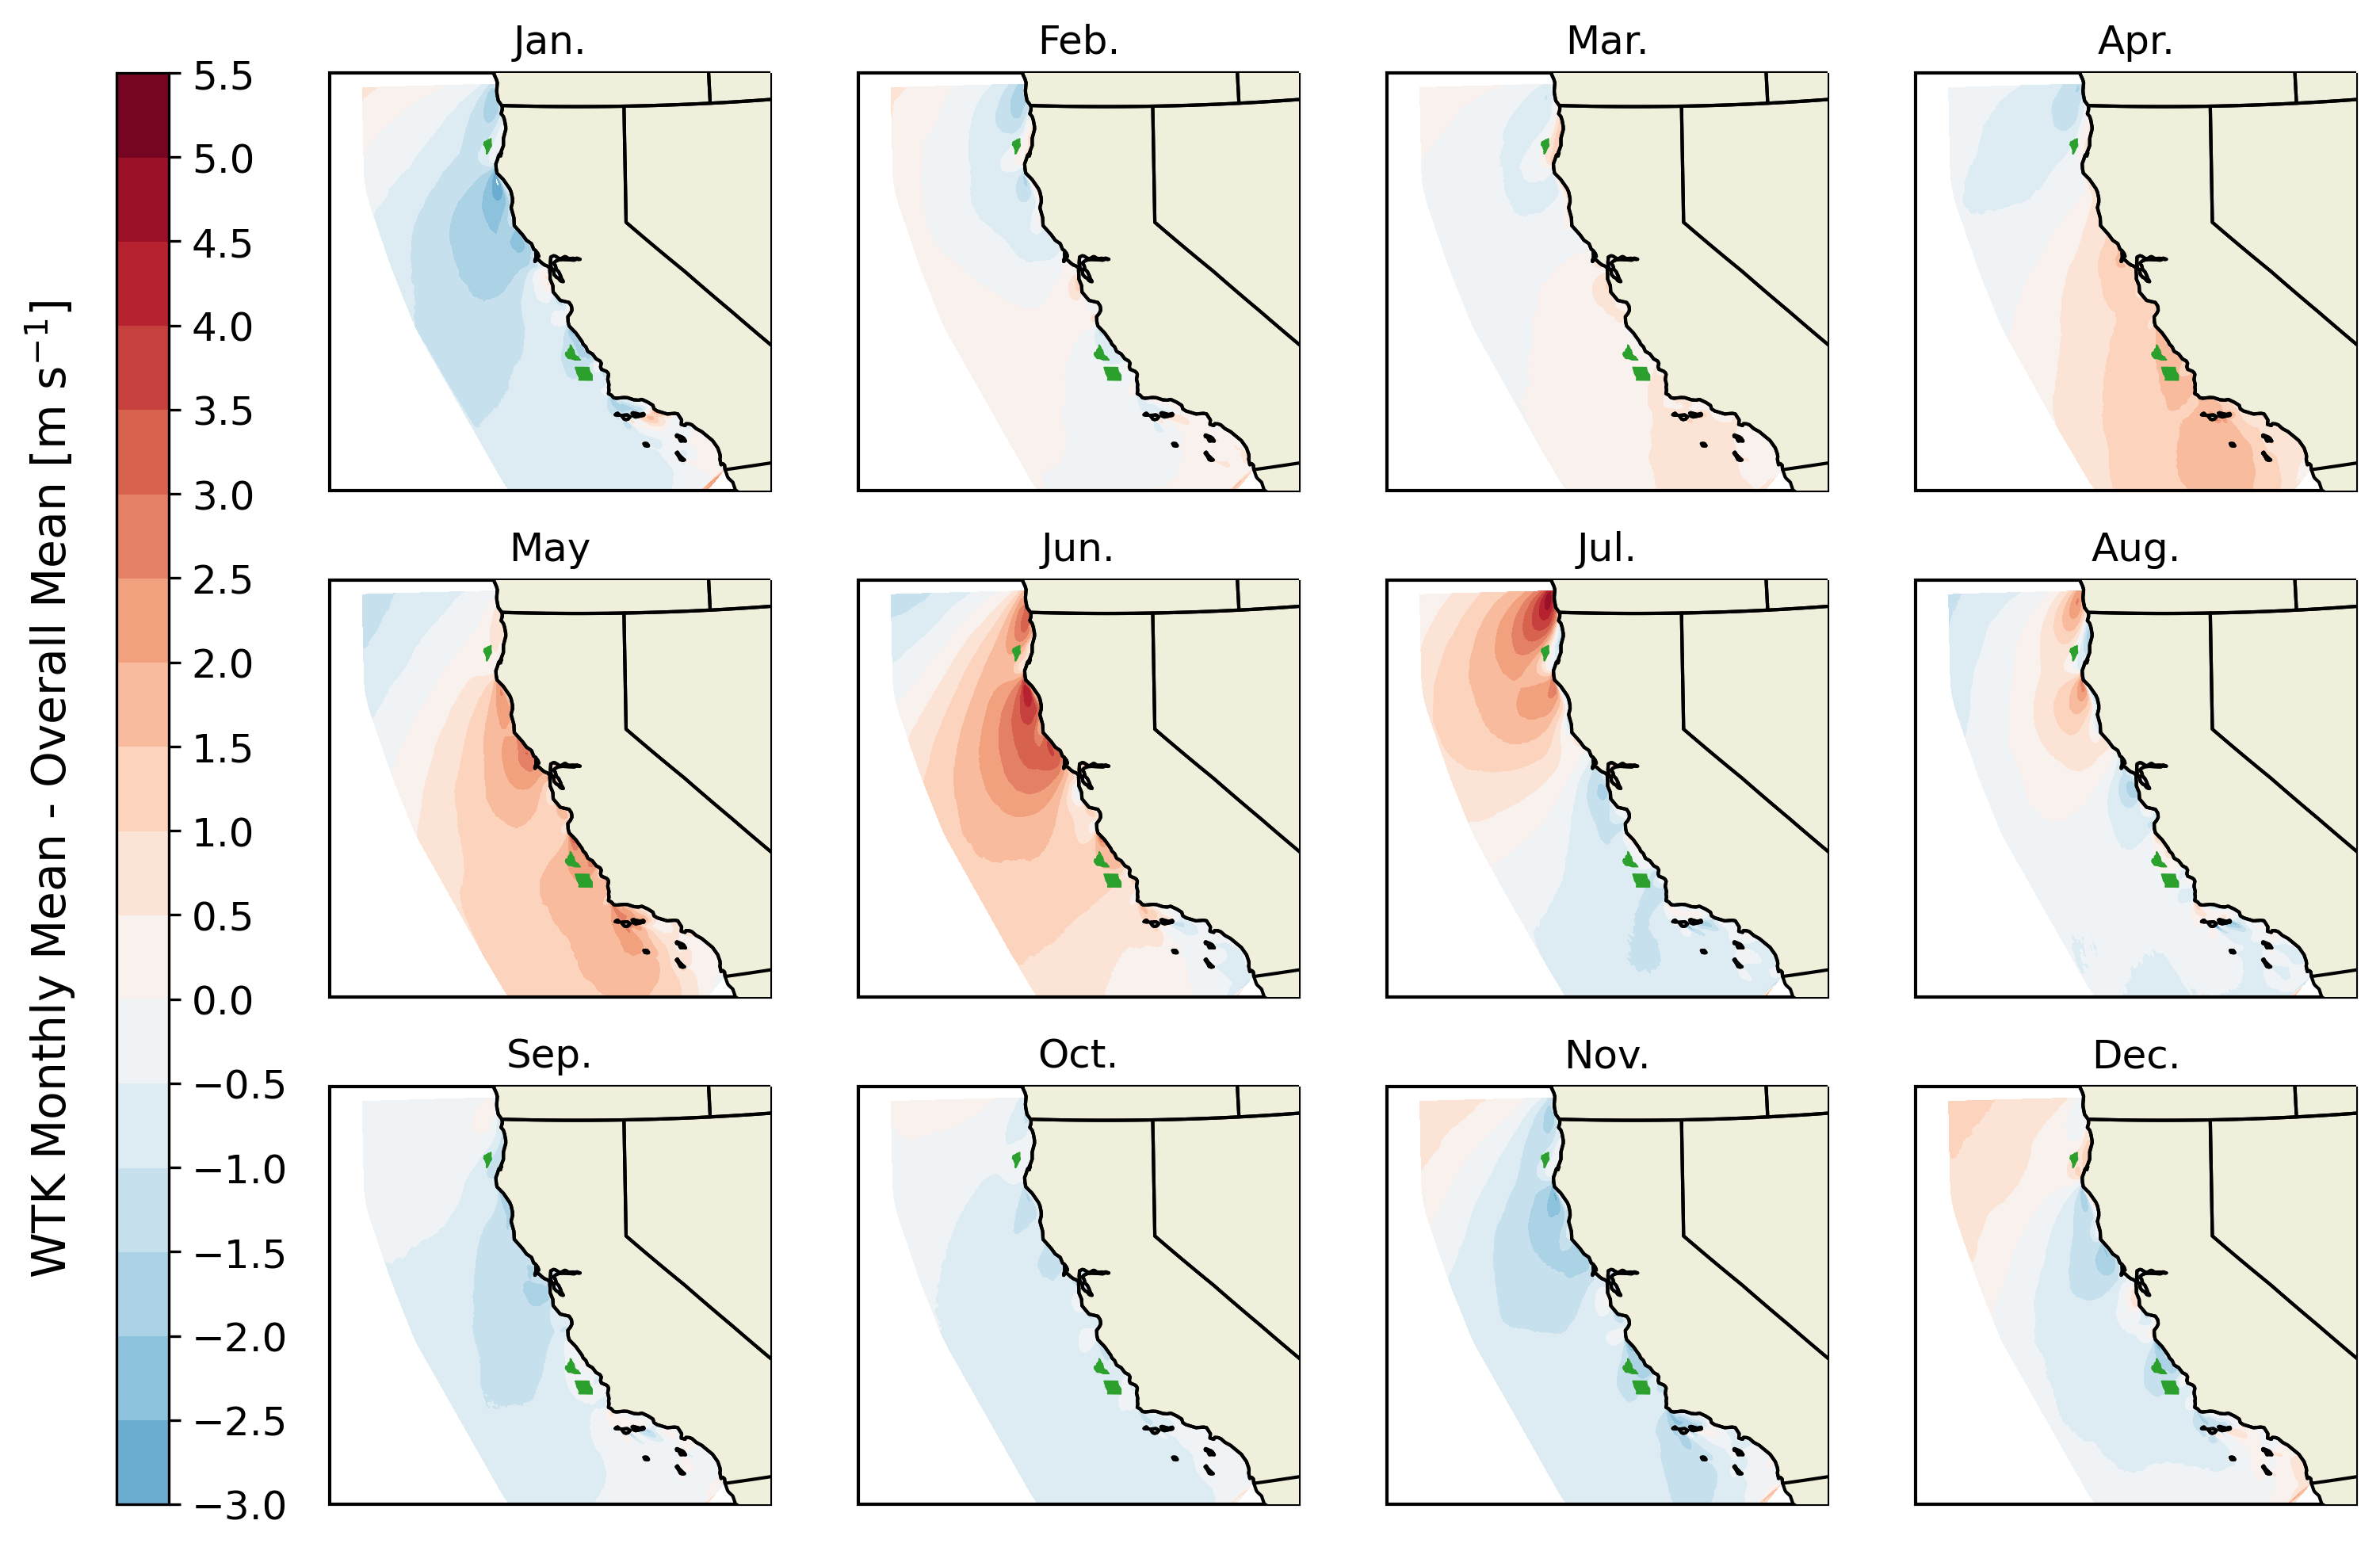

In [20]:
### Plot monthly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(3, 4, figsize=(11, 8), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-3, 5.5, 18)

diff01 = wtkm01.copy()
diff01['Winds'] = wtkm01['Winds']-wtk_full['Winds']
diff01 = diff01.dropna()

diff02 = wtkm02.copy()
diff02['Winds'] = wtkm02['Winds']-wtk_full['Winds']
diff02 = diff02.dropna()

diff03 = wtkm03.copy()
diff03['Winds'] = wtkm03['Winds']-wtk_full['Winds']
diff03 = diff03.dropna()

diff04 = wtkm04.copy()
diff04['Winds'] = wtkm04['Winds']-wtk_full['Winds']
diff04 = diff04.dropna()

diff05 = wtkm05.copy()
diff05['Winds'] = wtkm05['Winds']-wtk_full['Winds']
diff05 = diff05.dropna()

diff06 = wtkm06.copy()
diff06['Winds'] = wtkm06['Winds']-wtk_full['Winds']
diff06 = diff06.dropna()

diff07 = wtkm07.copy()
diff07['Winds'] = wtkm07['Winds']-wtk_full['Winds']
diff07 = diff07.dropna()

diff08 = wtkm08.copy()
diff08['Winds'] = wtkm08['Winds']-wtk_full['Winds']
diff08 = diff08.dropna()

diff09 = wtkm09.copy()
diff09['Winds'] = wtkm09['Winds']-wtk_full['Winds']
diff09 = diff09.dropna()

diff10 = wtkm10.copy()
diff10['Winds'] = wtkm10['Winds']-wtk_full['Winds']
diff10 = diff10.dropna()

diff11 = wtkm11.copy()
diff11['Winds'] = wtkm11['Winds']-wtk_full['Winds']
diff11 = diff11.dropna()

diff12 = wtkm12.copy()
diff12['Winds'] = wtkm12['Winds']-wtk_full['Winds']
diff12 = diff12.dropna()


im1 = ax[0,0].tricontourf(diff01['Long'],
                        diff01['Lat'],
                        diff01['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,1].tricontourf(diff02['Long'],
                        diff02['Lat'],
                        diff02['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,2].tricontourf(diff03['Long'],
                        diff03['Lat'],
                        diff03['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,3].tricontourf(diff04['Long'],
                        diff04['Lat'],
                        diff04['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,0].tricontourf(diff05['Long'],
                        diff05['Lat'],
                        diff05['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,1].tricontourf(diff06['Long'],
                        diff06['Lat'],
                        diff06['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,2].tricontourf(diff07['Long'],
                        diff07['Lat'],
                        diff07['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,3].tricontourf(diff08['Long'],
                        diff08['Lat'],
                        diff08['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,0].tricontourf(diff09['Long'],
                        diff09['Lat'],
                        diff09['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,1].tricontourf(diff10['Long'],
                        diff10['Lat'],
                        diff10['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,2].tricontourf(diff11['Long'],
                        diff11['Lat'],
                        diff11['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,3].tricontourf(diff12['Long'],
                        diff12['Lat'],
                        diff12['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))


# Colorbar
cax = fig.add_axes([ax[2,0].get_position().x1-0.25,ax[2,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[2,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('WTK Monthly Mean - Overall Mean [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("Jan.")
ax[0,1].set_title("Feb.")
ax[0,2].set_title("Mar.")
ax[0,3].set_title("Apr.")
ax[1,0].set_title("May")
ax[1,1].set_title("Jun.")
ax[1,2].set_title("Jul.")
ax[1,3].set_title("Aug.")
ax[2,0].set_title("Sep.")
ax[2,1].set_title("Oct.")
ax[2,2].set_title("Nov.")
ax[2,3].set_title("Dec.")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig20.png', bbox_inches='tight')

plt.show()

# Hourly

### Regrid WTK

In [21]:
# ### Interpolate WTK winds onto BOEM grid
# ## Load coords
# wtk_coords = np.loadtxt('data/wtk/coordinates.csv', delimiter=',')
# boem_coords = np.loadtxt('data/boem20/coordinates.csv')
# n_coords_boem = boem_coords.shape[0]

# ## Load one temporally averaged dataset
# for i in range(0,24):
#     print("Regridding hour", i)
#     wtk_winds_raw = np.loadtxt('data/wtk/hr_'+str(i).zfill(2)+'.csv')
#     wtk_winds_interp = interpolate.griddata(wtk_coords,
#                               wtk_winds_raw, boem_coords, method='cubic')
    
#     winds_wtk_interp_df = np.vstack((wtk_winds_interp, boem_coords.T))
#     winds_wtk_interp_df = pd.DataFrame(winds_wtk_interp_df.T, columns=['Winds', 'Lat', 'Long'])
    
#     winds_wtk_interp_df.to_csv('data/wtk/hour_'+str(i).zfill(2)+'_interp2boem.csv', index=False)

### Load Data

In [22]:
### Read data
## Load monthly data
# WTK
wtkh00 = pd.read_csv('data/wtk/hour_00_interp2ca.csv')
wtkh01 = pd.read_csv('data/wtk/hour_01_interp2ca.csv')
wtkh02 = pd.read_csv('data/wtk/hour_02_interp2ca.csv')
wtkh03 = pd.read_csv('data/wtk/hour_03_interp2ca.csv')
wtkh04 = pd.read_csv('data/wtk/hour_04_interp2ca.csv')
wtkh05 = pd.read_csv('data/wtk/hour_05_interp2ca.csv')
wtkh06 = pd.read_csv('data/wtk/hour_06_interp2ca.csv')
wtkh07 = pd.read_csv('data/wtk/hour_07_interp2ca.csv')
wtkh08 = pd.read_csv('data/wtk/hour_08_interp2ca.csv')
wtkh09 = pd.read_csv('data/wtk/hour_09_interp2ca.csv')
wtkh10 = pd.read_csv('data/wtk/hour_10_interp2ca.csv')
wtkh11 = pd.read_csv('data/wtk/hour_11_interp2ca.csv')
wtkh12 = pd.read_csv('data/wtk/hour_12_interp2ca.csv')
wtkh13 = pd.read_csv('data/wtk/hour_13_interp2ca.csv')
wtkh14 = pd.read_csv('data/wtk/hour_14_interp2ca.csv')
wtkh15 = pd.read_csv('data/wtk/hour_15_interp2ca.csv')
wtkh16 = pd.read_csv('data/wtk/hour_16_interp2ca.csv')
wtkh17 = pd.read_csv('data/wtk/hour_17_interp2ca.csv')
wtkh18 = pd.read_csv('data/wtk/hour_18_interp2ca.csv')
wtkh19 = pd.read_csv('data/wtk/hour_19_interp2ca.csv')
wtkh20 = pd.read_csv('data/wtk/hour_20_interp2ca.csv')
wtkh21 = pd.read_csv('data/wtk/hour_21_interp2ca.csv')
wtkh22 = pd.read_csv('data/wtk/hour_22_interp2ca.csv')
wtkh23 = pd.read_csv('data/wtk/hour_23_interp2ca.csv')

wtkh00['Winds'] /= 100
wtkh01['Winds'] /= 100
wtkh02['Winds'] /= 100
wtkh03['Winds'] /= 100
wtkh04['Winds'] /= 100
wtkh05['Winds'] /= 100
wtkh06['Winds'] /= 100
wtkh07['Winds'] /= 100
wtkh08['Winds'] /= 100
wtkh09['Winds'] /= 100
wtkh10['Winds'] /= 100
wtkh11['Winds'] /= 100
wtkh12['Winds'] /= 100
wtkh13['Winds'] /= 100
wtkh14['Winds'] /= 100
wtkh15['Winds'] /= 100
wtkh16['Winds'] /= 100
wtkh17['Winds'] /= 100
wtkh18['Winds'] /= 100
wtkh19['Winds'] /= 100
wtkh20['Winds'] /= 100
wtkh21['Winds'] /= 100
wtkh22['Winds'] /= 100
wtkh23['Winds'] /= 100

# BOEM
boemh00 = np.loadtxt('data/ca20/hour_00.csv')
boemh01 = np.loadtxt('data/ca20/hour_01.csv')
boemh02 = np.loadtxt('data/ca20/hour_02.csv')
boemh03 = np.loadtxt('data/ca20/hour_03.csv')
boemh04 = np.loadtxt('data/ca20/hour_04.csv')
boemh05 = np.loadtxt('data/ca20/hour_05.csv')
boemh06 = np.loadtxt('data/ca20/hour_06.csv')
boemh07 = np.loadtxt('data/ca20/hour_07.csv')
boemh08 = np.loadtxt('data/ca20/hour_08.csv')
boemh09 = np.loadtxt('data/ca20/hour_09.csv')
boemh10 = np.loadtxt('data/ca20/hour_10.csv')
boemh11 = np.loadtxt('data/ca20/hour_11.csv')
boemh12 = np.loadtxt('data/ca20/hour_12.csv')
boemh13 = np.loadtxt('data/ca20/hour_13.csv')
boemh14 = np.loadtxt('data/ca20/hour_14.csv')
boemh15 = np.loadtxt('data/ca20/hour_15.csv')
boemh16 = np.loadtxt('data/ca20/hour_16.csv')
boemh17 = np.loadtxt('data/ca20/hour_17.csv')
boemh18 = np.loadtxt('data/ca20/hour_18.csv')
boemh19 = np.loadtxt('data/ca20/hour_19.csv')
boemh20 = np.loadtxt('data/ca20/hour_20.csv')
boemh21 = np.loadtxt('data/ca20/hour_21.csv')
boemh22 = np.loadtxt('data/ca20/hour_22.csv')
boemh23 = np.loadtxt('data/ca20/hour_23.csv')

boemh00 /= 100
boemh01 /= 100
boemh02 /= 100
boemh03 /= 100
boemh04 /= 100
boemh05 /= 100
boemh06 /= 100
boemh07 /= 100
boemh08 /= 100
boemh09 /= 100
boemh10 /= 100
boemh11 /= 100
boemh12 /= 100
boemh13 /= 100
boemh14 /= 100
boemh15 /= 100
boemh16 /= 100
boemh17 /= 100
boemh18 /= 100
boemh19 /= 100
boemh20 /= 100
boemh21 /= 100
boemh22 /= 100
boemh23 /= 100

coords = np.loadtxt('data/ca20/coordinates_ca20.csv')

In [23]:
### Calculate lat/long info for the map
lat_vec = coords[:,0]
long_vec = coords[:,1]

LAT_MIN = lat_vec.min()
LAT_MAX = lat_vec.max()
LAT_MEAN = lat_vec.mean()
LONG_MIN = long_vec.min()
LONG_MAX = long_vec.max()
LONG_MEAN = long_vec.mean()
MAP_BOUNDS = [LONG_MIN, LONG_MAX, LAT_MIN, LAT_MAX]

In [24]:
### Establish higher res cartopy data
# import cartopy
# print(cartopy.config['data_dir'])

coastline_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '50m')
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m')
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')

states_50m = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lakes', '50m')

In [25]:
### Process shapefiles for lease regions
## Load shapefiles
df = gpd.read_file('data/shapefiles/CA_Call_Areas_2018_09_26.shp')

## Convert projection to match what we use in Cartopy
crs = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
crs_proj4 = crs.proj4_init
df_proj = df.to_crs(crs_proj4)

## Merge (aka dissolve) geometries by lease area
df_proj_group = df_proj.dissolve(by='AREA_NM')

In [26]:
### Calculate difference and cleanup NaNs
## Set up dataframe
pd_diff = np.zeros((len(boemh01), 26))
cols = ['Lat', 'Long',
           '00', '01', '02',
           '03', '04', '05',
           '06', '07', '08',
           '09', '10', '11',
           '12', '13', '14',
           '15', '16', '17',
           '18', '19', '20',
           '21', '22', '23']
pd_diff = pd.DataFrame(pd_diff, columns=cols)

## Populate wind differences
##     Note: Times are converted from UTC to PT
pd_diff['Lat'] = wtkh00['Lat']
pd_diff['Long'] = wtkh00['Long']
pd_diff['00'] = boemh08 - wtkh08['Winds']
pd_diff['01'] = boemh09 - wtkh09['Winds']
pd_diff['02'] = boemh10 - wtkh10['Winds']
pd_diff['03'] = boemh11 - wtkh11['Winds']
pd_diff['04'] = boemh12 - wtkh12['Winds']
pd_diff['05'] = boemh13 - wtkh13['Winds']
pd_diff['06'] = boemh14 - wtkh14['Winds']
pd_diff['07'] = boemh15 - wtkh15['Winds']
pd_diff['08'] = boemh16 - wtkh16['Winds']
pd_diff['09'] = boemh17 - wtkh17['Winds']
pd_diff['10'] = boemh18 - wtkh18['Winds']
pd_diff['11'] = boemh19 - wtkh19['Winds']
pd_diff['12'] = boemh20 - wtkh20['Winds']
pd_diff['13'] = boemh21 - wtkh21['Winds']
pd_diff['14'] = boemh22 - wtkh22['Winds']
pd_diff['15'] = boemh23 - wtkh23['Winds']
pd_diff['16'] = boemh00 - wtkh00['Winds']
pd_diff['17'] = boemh01 - wtkh01['Winds']
pd_diff['18'] = boemh02 - wtkh02['Winds']
pd_diff['19'] = boemh03 - wtkh03['Winds']
pd_diff['20'] = boemh04 - wtkh04['Winds']
pd_diff['21'] = boemh05 - wtkh05['Winds']
pd_diff['22'] = boemh06 - wtkh06['Winds']
pd_diff['23'] = boemh07 - wtkh07['Winds']
# pd_diff['00'] = boemh00 - wtkh00['Winds']
# pd_diff['01'] = boemh01 - wtkh01['Winds']
# pd_diff['02'] = boemh02 - wtkh02['Winds']
# pd_diff['03'] = boemh03 - wtkh03['Winds']
# pd_diff['04'] = boemh04 - wtkh04['Winds']
# pd_diff['05'] = boemh05 - wtkh05['Winds']
# pd_diff['06'] = boemh06 - wtkh06['Winds']
# pd_diff['07'] = boemh07 - wtkh07['Winds']
# pd_diff['08'] = boemh08 - wtkh08['Winds']
# pd_diff['09'] = boemh09 - wtkh09['Winds']
# pd_diff['10'] = boemh10 - wtkh10['Winds']
# pd_diff['11'] = boemh11 - wtkh11['Winds']
# pd_diff['12'] = boemh12 - wtkh12['Winds']
# pd_diff['13'] = boemh13 - wtkh13['Winds']
# pd_diff['14'] = boemh14 - wtkh14['Winds']
# pd_diff['15'] = boemh15 - wtkh15['Winds']
# pd_diff['16'] = boemh16 - wtkh16['Winds']
# pd_diff['17'] = boemh17 - wtkh17['Winds']
# pd_diff['18'] = boemh18 - wtkh18['Winds']
# pd_diff['19'] = boemh19 - wtkh19['Winds']
# pd_diff['20'] = boemh20 - wtkh20['Winds']
# pd_diff['21'] = boemh21 - wtkh21['Winds']
# pd_diff['22'] = boemh22 - wtkh22['Winds']
# pd_diff['23'] = boemh23 - wtkh23['Winds']

## Drop NaNs
pd_diff = pd_diff.dropna()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlop

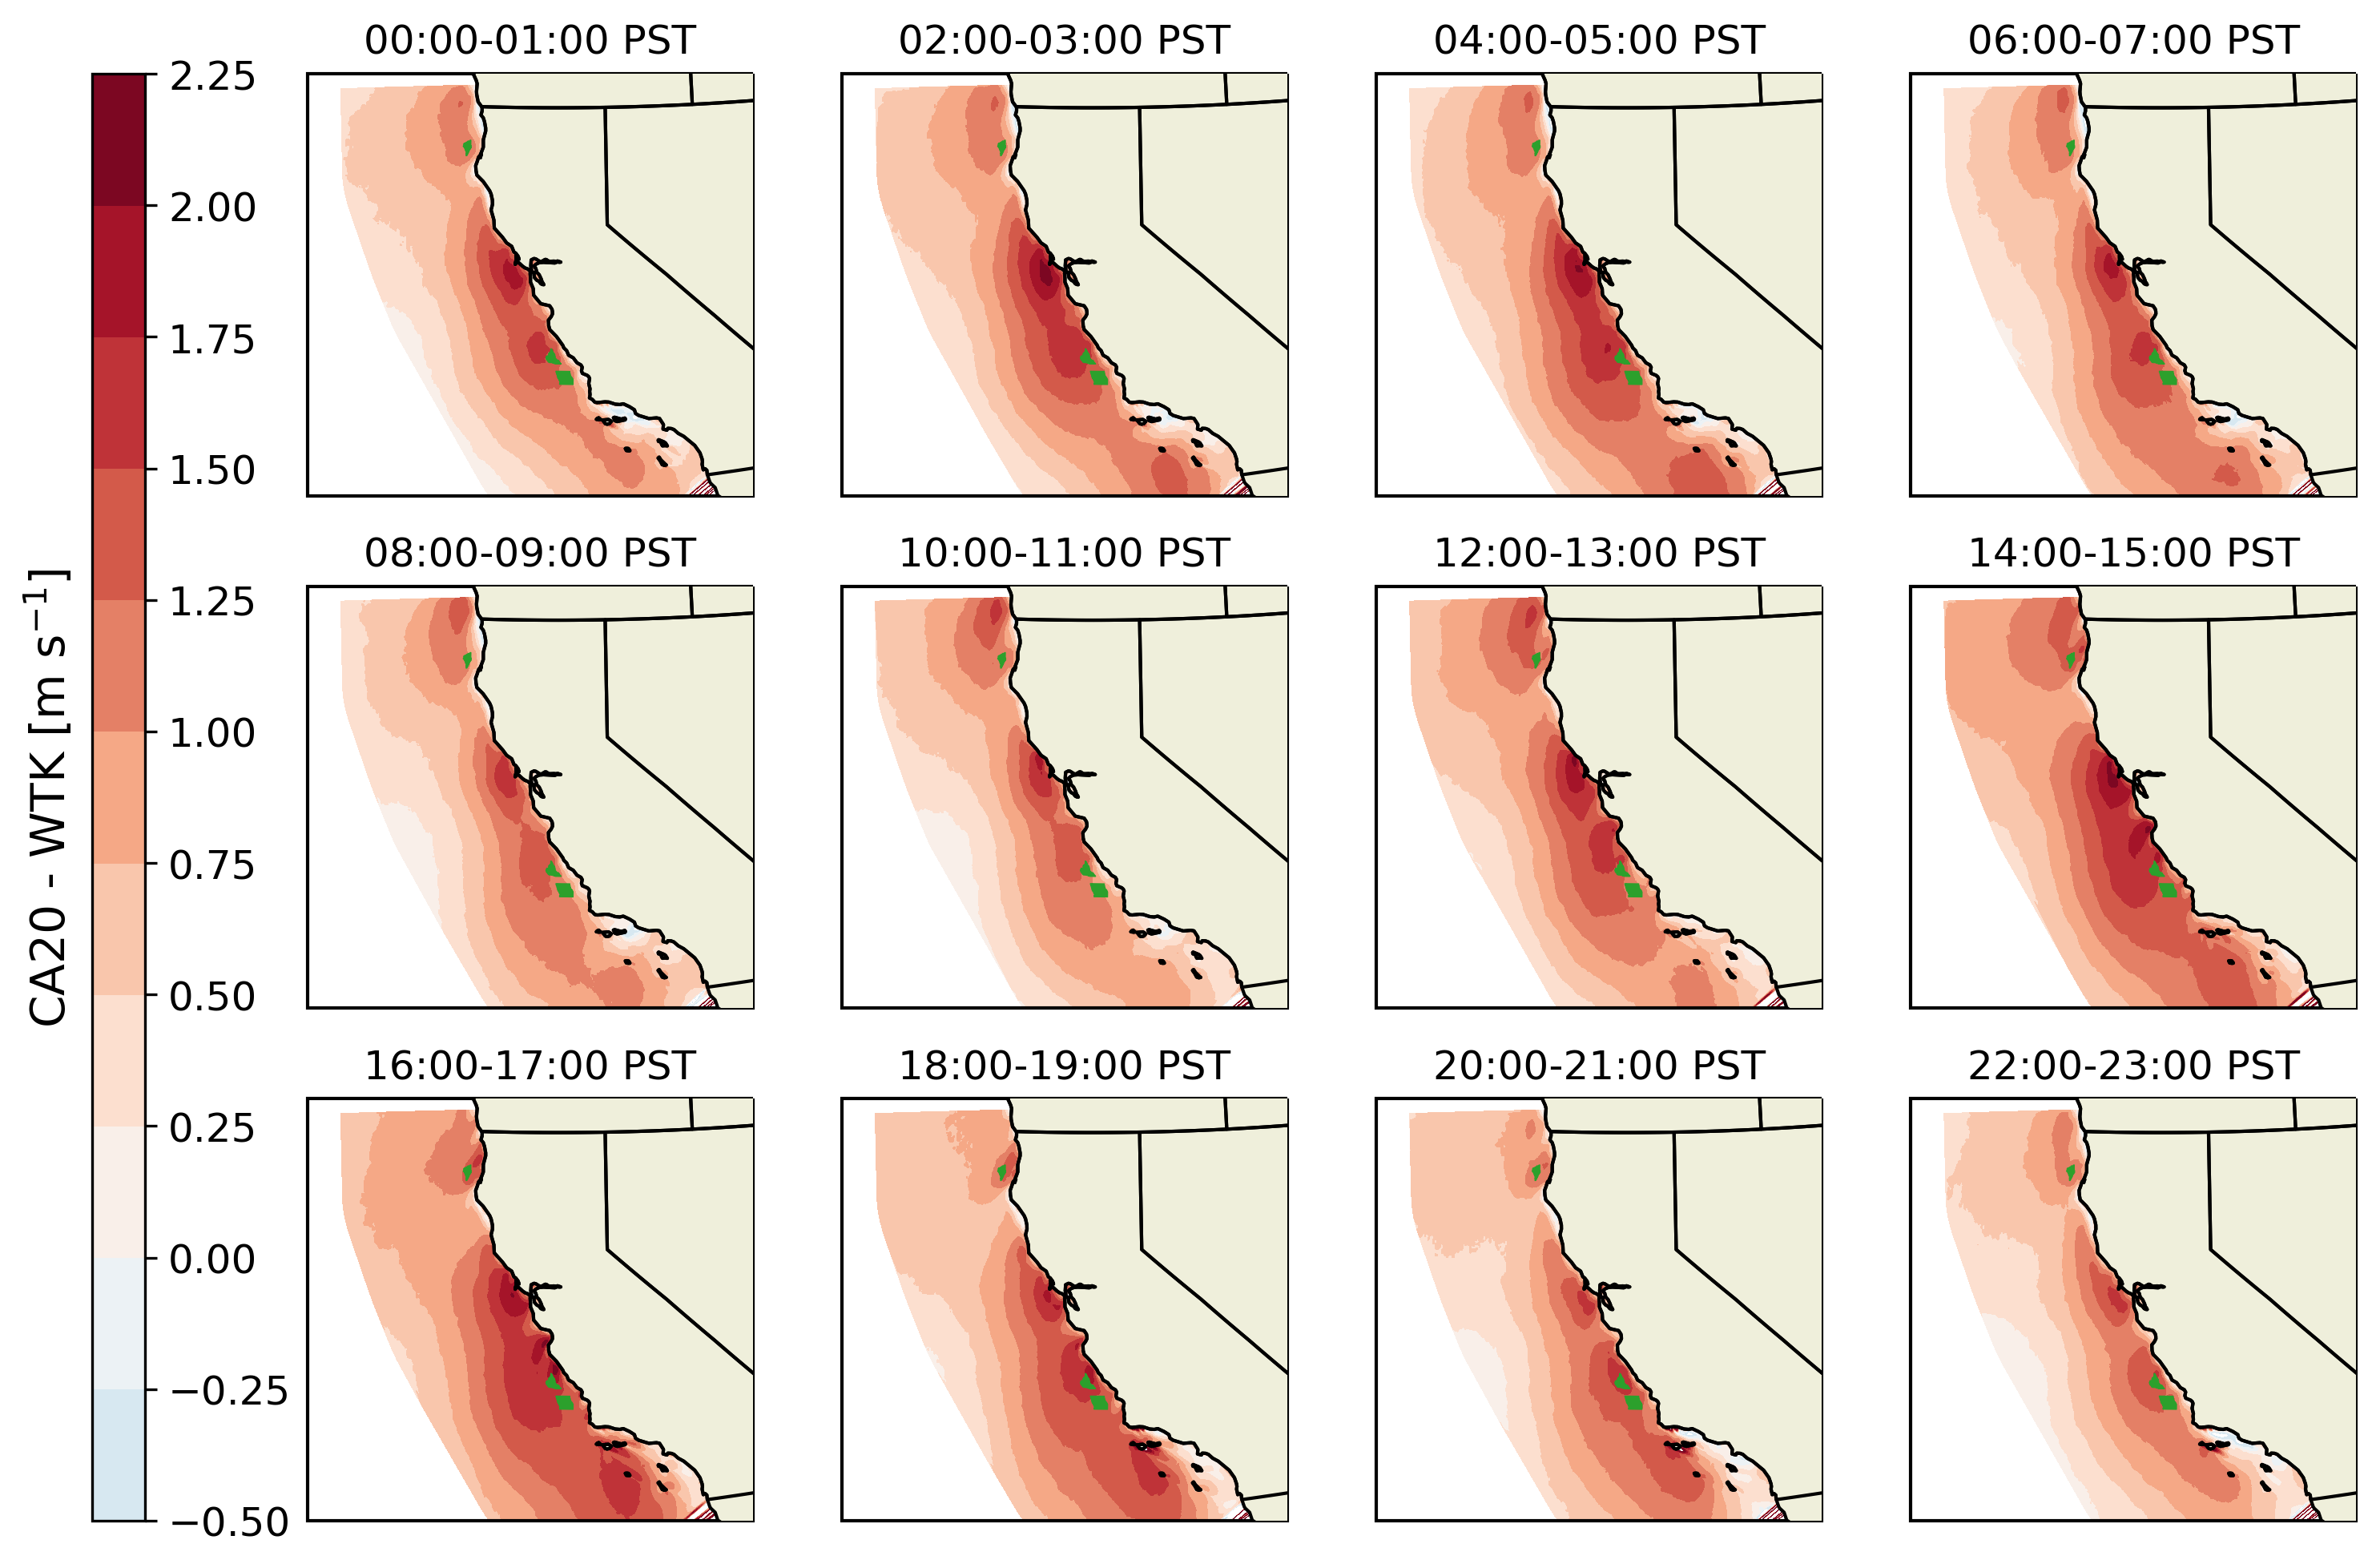

In [27]:
### Plot hourly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(3, 4, figsize=(11, 8), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-0.5, 2.25, 12)

im1 = ax[0,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['00'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['02'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['04'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['06'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['08'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['10'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['12'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['14'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['16'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['18'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['20'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        pd_diff['22'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))


# Colorbar
cax = fig.add_axes([ax[-1,0].get_position().x1-0.25,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('CA20 - WTK [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("00:00-01:00 PST")
ax[0,1].set_title("02:00-03:00 PST")
ax[0,2].set_title("04:00-05:00 PST")
ax[0,3].set_title("06:00-07:00 PST")
ax[1,0].set_title("08:00-09:00 PST")
ax[1,1].set_title("10:00-11:00 PST")
ax[1,2].set_title("12:00-13:00 PST")
ax[1,3].set_title("14:00-15:00 PST")
ax[2,0].set_title("16:00-17:00 PST")
ax[2,1].set_title("18:00-19:00 PST")
ax[2,2].set_title("20:00-21:00 PST")
ax[2,3].set_title("22:00-23:00 PST")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig22.png', bbox_inches='tight')

plt.show()

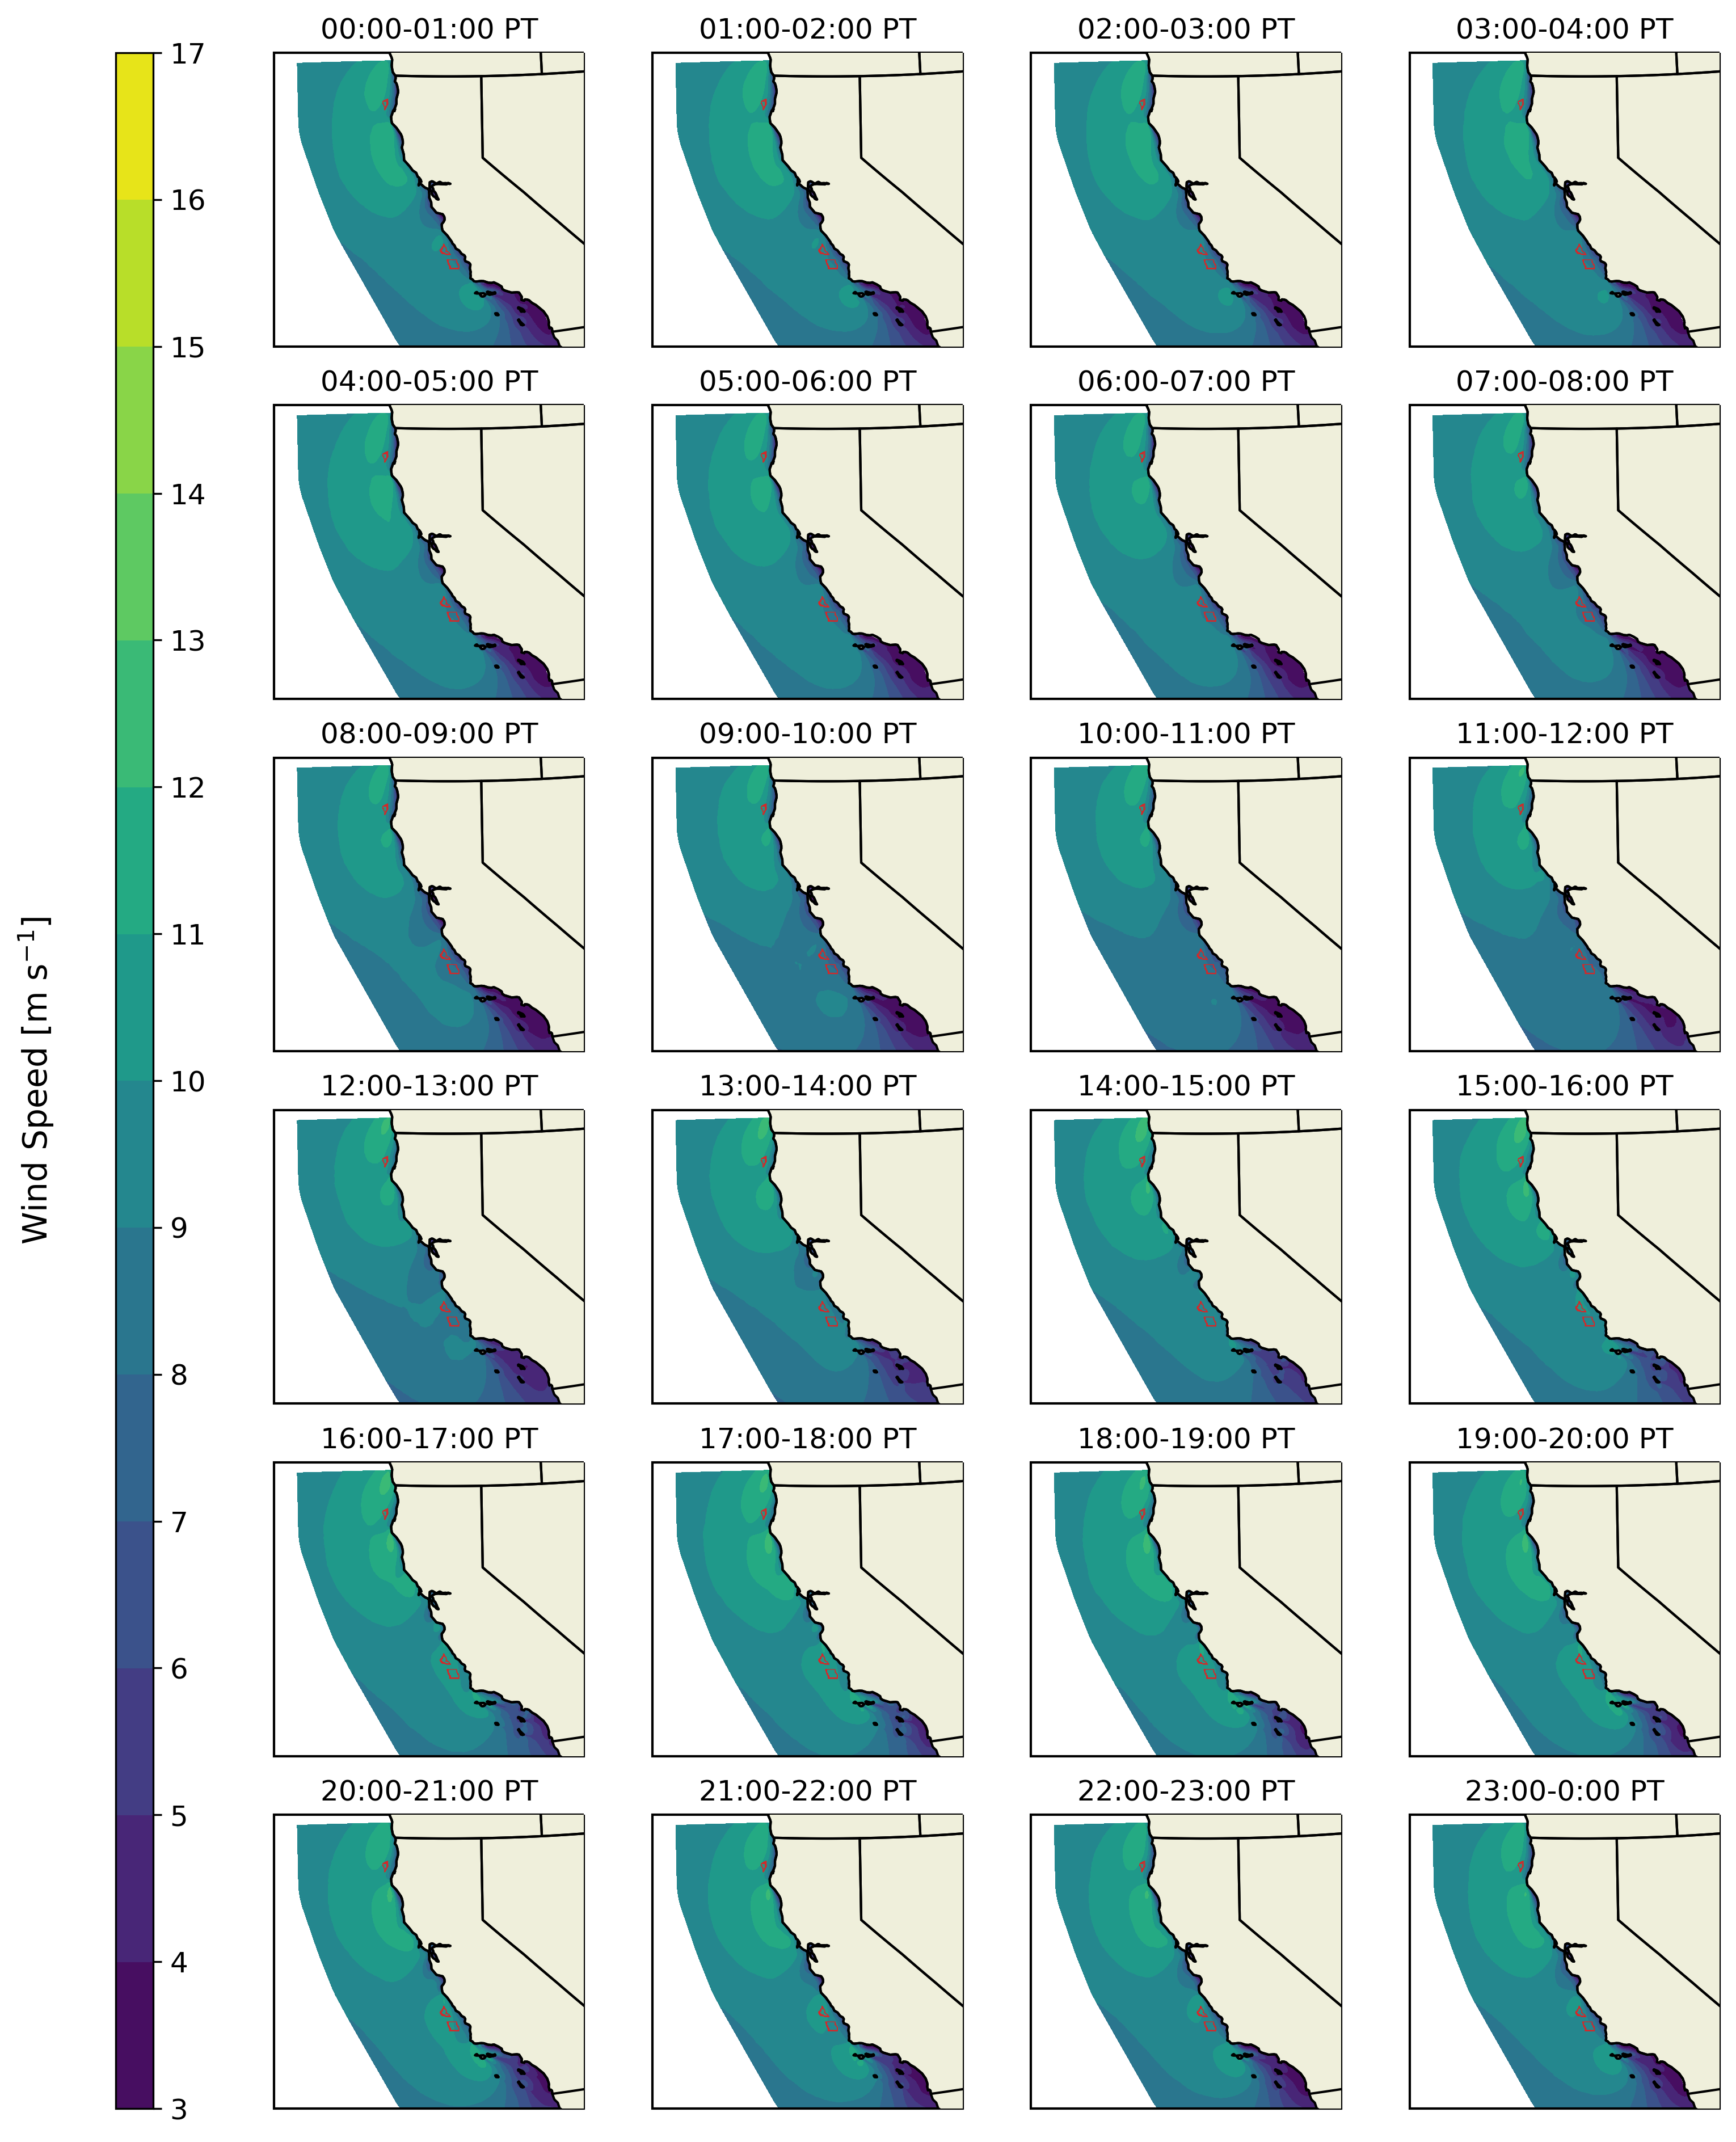

In [28]:
### Plot hourly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(6, 4, figsize=(11, 16), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-0.5, 2.25, 12)

im1 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        boemh08,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        boemh09,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        boemh10,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,3].tricontourf(long_vec,
                        lat_vec,
                        boemh11,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        boemh12,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        boemh13,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        boemh14,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,3].tricontourf(long_vec,
                        lat_vec,
                        boemh15,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,0].tricontourf(long_vec,
                        lat_vec,
                        boemh16,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,1].tricontourf(long_vec,
                        lat_vec,
                        boemh17,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,2].tricontourf(long_vec,
                        lat_vec,
                        boemh18,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,3].tricontourf(long_vec,
                        lat_vec,
                        boemh19,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,0].tricontourf(long_vec,
                        lat_vec,
                        boemh20,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,1].tricontourf(long_vec,
                        lat_vec,
                        boemh21,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,2].tricontourf(long_vec,
                        lat_vec,
                        boemh22,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,3].tricontourf(long_vec,
                        lat_vec,
                        boemh23,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,0].tricontourf(long_vec,
                        lat_vec,
                        boemh00,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,1].tricontourf(long_vec,
                        lat_vec,
                        boemh01,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,2].tricontourf(long_vec,
                        lat_vec,
                        boemh02,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,3].tricontourf(long_vec,
                        lat_vec,
                        boemh03,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,0].tricontourf(long_vec,
                        lat_vec,
                        boemh04,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,1].tricontourf(long_vec,
                        lat_vec,
                        boemh05,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,2].tricontourf(long_vec,
                        lat_vec,
                        boemh06,
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,3].tricontourf(long_vec,
                        lat_vec,
                        boemh07,
                        ticks_wind, transform=ccrs.Geodetic())


# Colorbar
cax = fig.add_axes([ax[5,0].get_position().x1-0.25,ax[5,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[5,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_wind)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('Wind Speed [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("00:00-01:00 PT")
ax[0,1].set_title("01:00-02:00 PT")
ax[0,2].set_title("02:00-03:00 PT")
ax[0,3].set_title("03:00-04:00 PT")
ax[1,0].set_title("04:00-05:00 PT")
ax[1,1].set_title("05:00-06:00 PT")
ax[1,2].set_title("06:00-07:00 PT")
ax[1,3].set_title("07:00-08:00 PT")
ax[2,0].set_title("08:00-09:00 PT")
ax[2,1].set_title("09:00-10:00 PT")
ax[2,2].set_title("10:00-11:00 PT")
ax[2,3].set_title("11:00-12:00 PT")
ax[3,0].set_title("12:00-13:00 PT")
ax[3,1].set_title("13:00-14:00 PT")
ax[3,2].set_title("14:00-15:00 PT")
ax[3,3].set_title("15:00-16:00 PT")
ax[4,0].set_title("16:00-17:00 PT")
ax[4,1].set_title("17:00-18:00 PT")
ax[4,2].set_title("18:00-19:00 PT")
ax[4,3].set_title("19:00-20:00 PT")
ax[5,0].set_title("20:00-21:00 PT")
ax[5,1].set_title("21:00-22:00 PT")
ax[5,2].set_title("22:00-23:00 PT")
ax[5,3].set_title("23:00-0:00 PT")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)

# plt.savefig('../figures/boem_hourly.png', bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


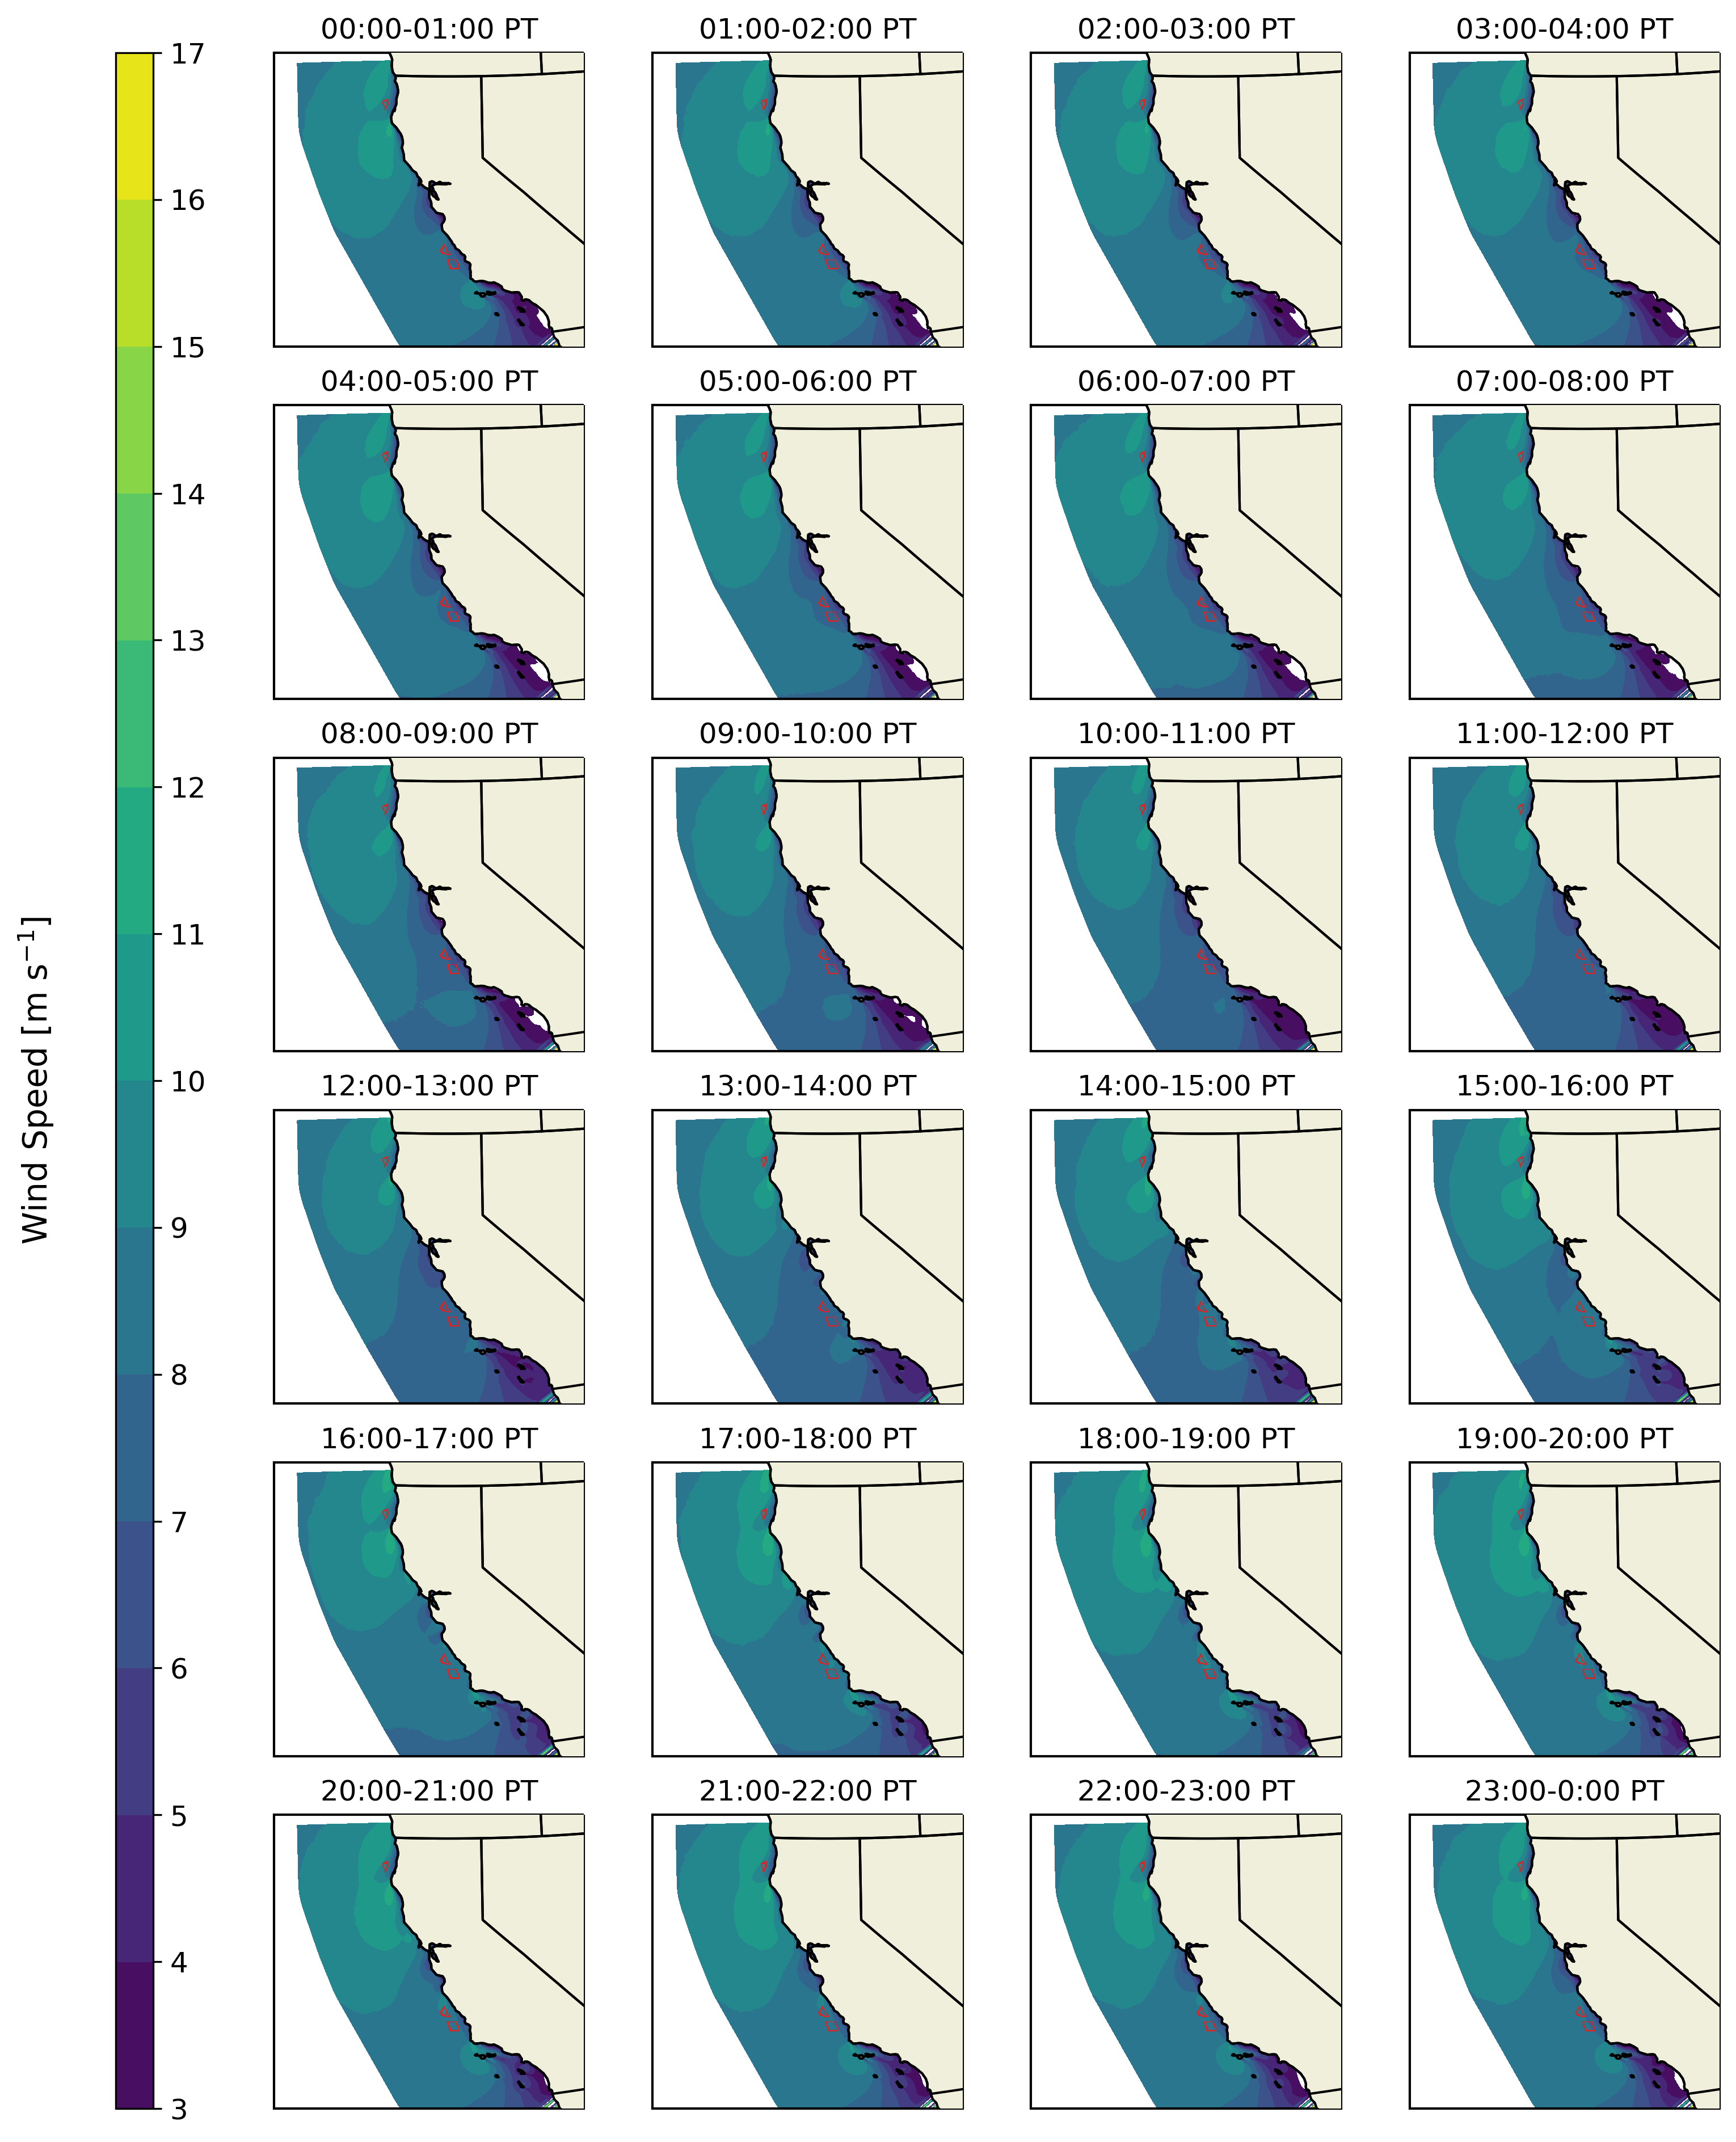

In [29]:
### Plot hourly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(6, 4, figsize=(11, 16), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-0.5, 2.25, 12)

im1 = ax[0,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh08.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh09.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh10.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[0,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh11.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh12.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh13.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh14.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[1,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh15.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh16.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh17.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh18.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[2,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh19.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh20.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh21.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh22.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[3,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh23.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh00.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh01.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh02.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[4,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh03.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,0].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh04.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,1].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh05.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,2].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh06.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())
im = ax[5,3].tricontourf(pd_diff['Long'],
                        pd_diff['Lat'],
                        wtkh07.dropna()['Winds'],
                        ticks_wind, transform=ccrs.Geodetic())


# Colorbar
cax = fig.add_axes([ax[5,0].get_position().x1-0.25,ax[5,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[5,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_wind)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('Wind Speed [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("00:00-01:00 PT")
ax[0,1].set_title("01:00-02:00 PT")
ax[0,2].set_title("02:00-03:00 PT")
ax[0,3].set_title("03:00-04:00 PT")
ax[1,0].set_title("04:00-05:00 PT")
ax[1,1].set_title("05:00-06:00 PT")
ax[1,2].set_title("06:00-07:00 PT")
ax[1,3].set_title("07:00-08:00 PT")
ax[2,0].set_title("08:00-09:00 PT")
ax[2,1].set_title("09:00-10:00 PT")
ax[2,2].set_title("10:00-11:00 PT")
ax[2,3].set_title("11:00-12:00 PT")
ax[3,0].set_title("12:00-13:00 PT")
ax[3,1].set_title("13:00-14:00 PT")
ax[3,2].set_title("14:00-15:00 PT")
ax[3,3].set_title("15:00-16:00 PT")
ax[4,0].set_title("16:00-17:00 PT")
ax[4,1].set_title("17:00-18:00 PT")
ax[4,2].set_title("18:00-19:00 PT")
ax[4,3].set_title("19:00-20:00 PT")
ax[5,0].set_title("20:00-21:00 PT")
ax[5,1].set_title("21:00-22:00 PT")
ax[5,2].set_title("22:00-23:00 PT")
ax[5,3].set_title("23:00-0:00 PT")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[3,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[4,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[5,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[3,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[4,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[5,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[3,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[4,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)
ax[5,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C3', facecolor='None', linewidth=0.3)

# plt.savefig('../figures/wtk_hourly.png', bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlop

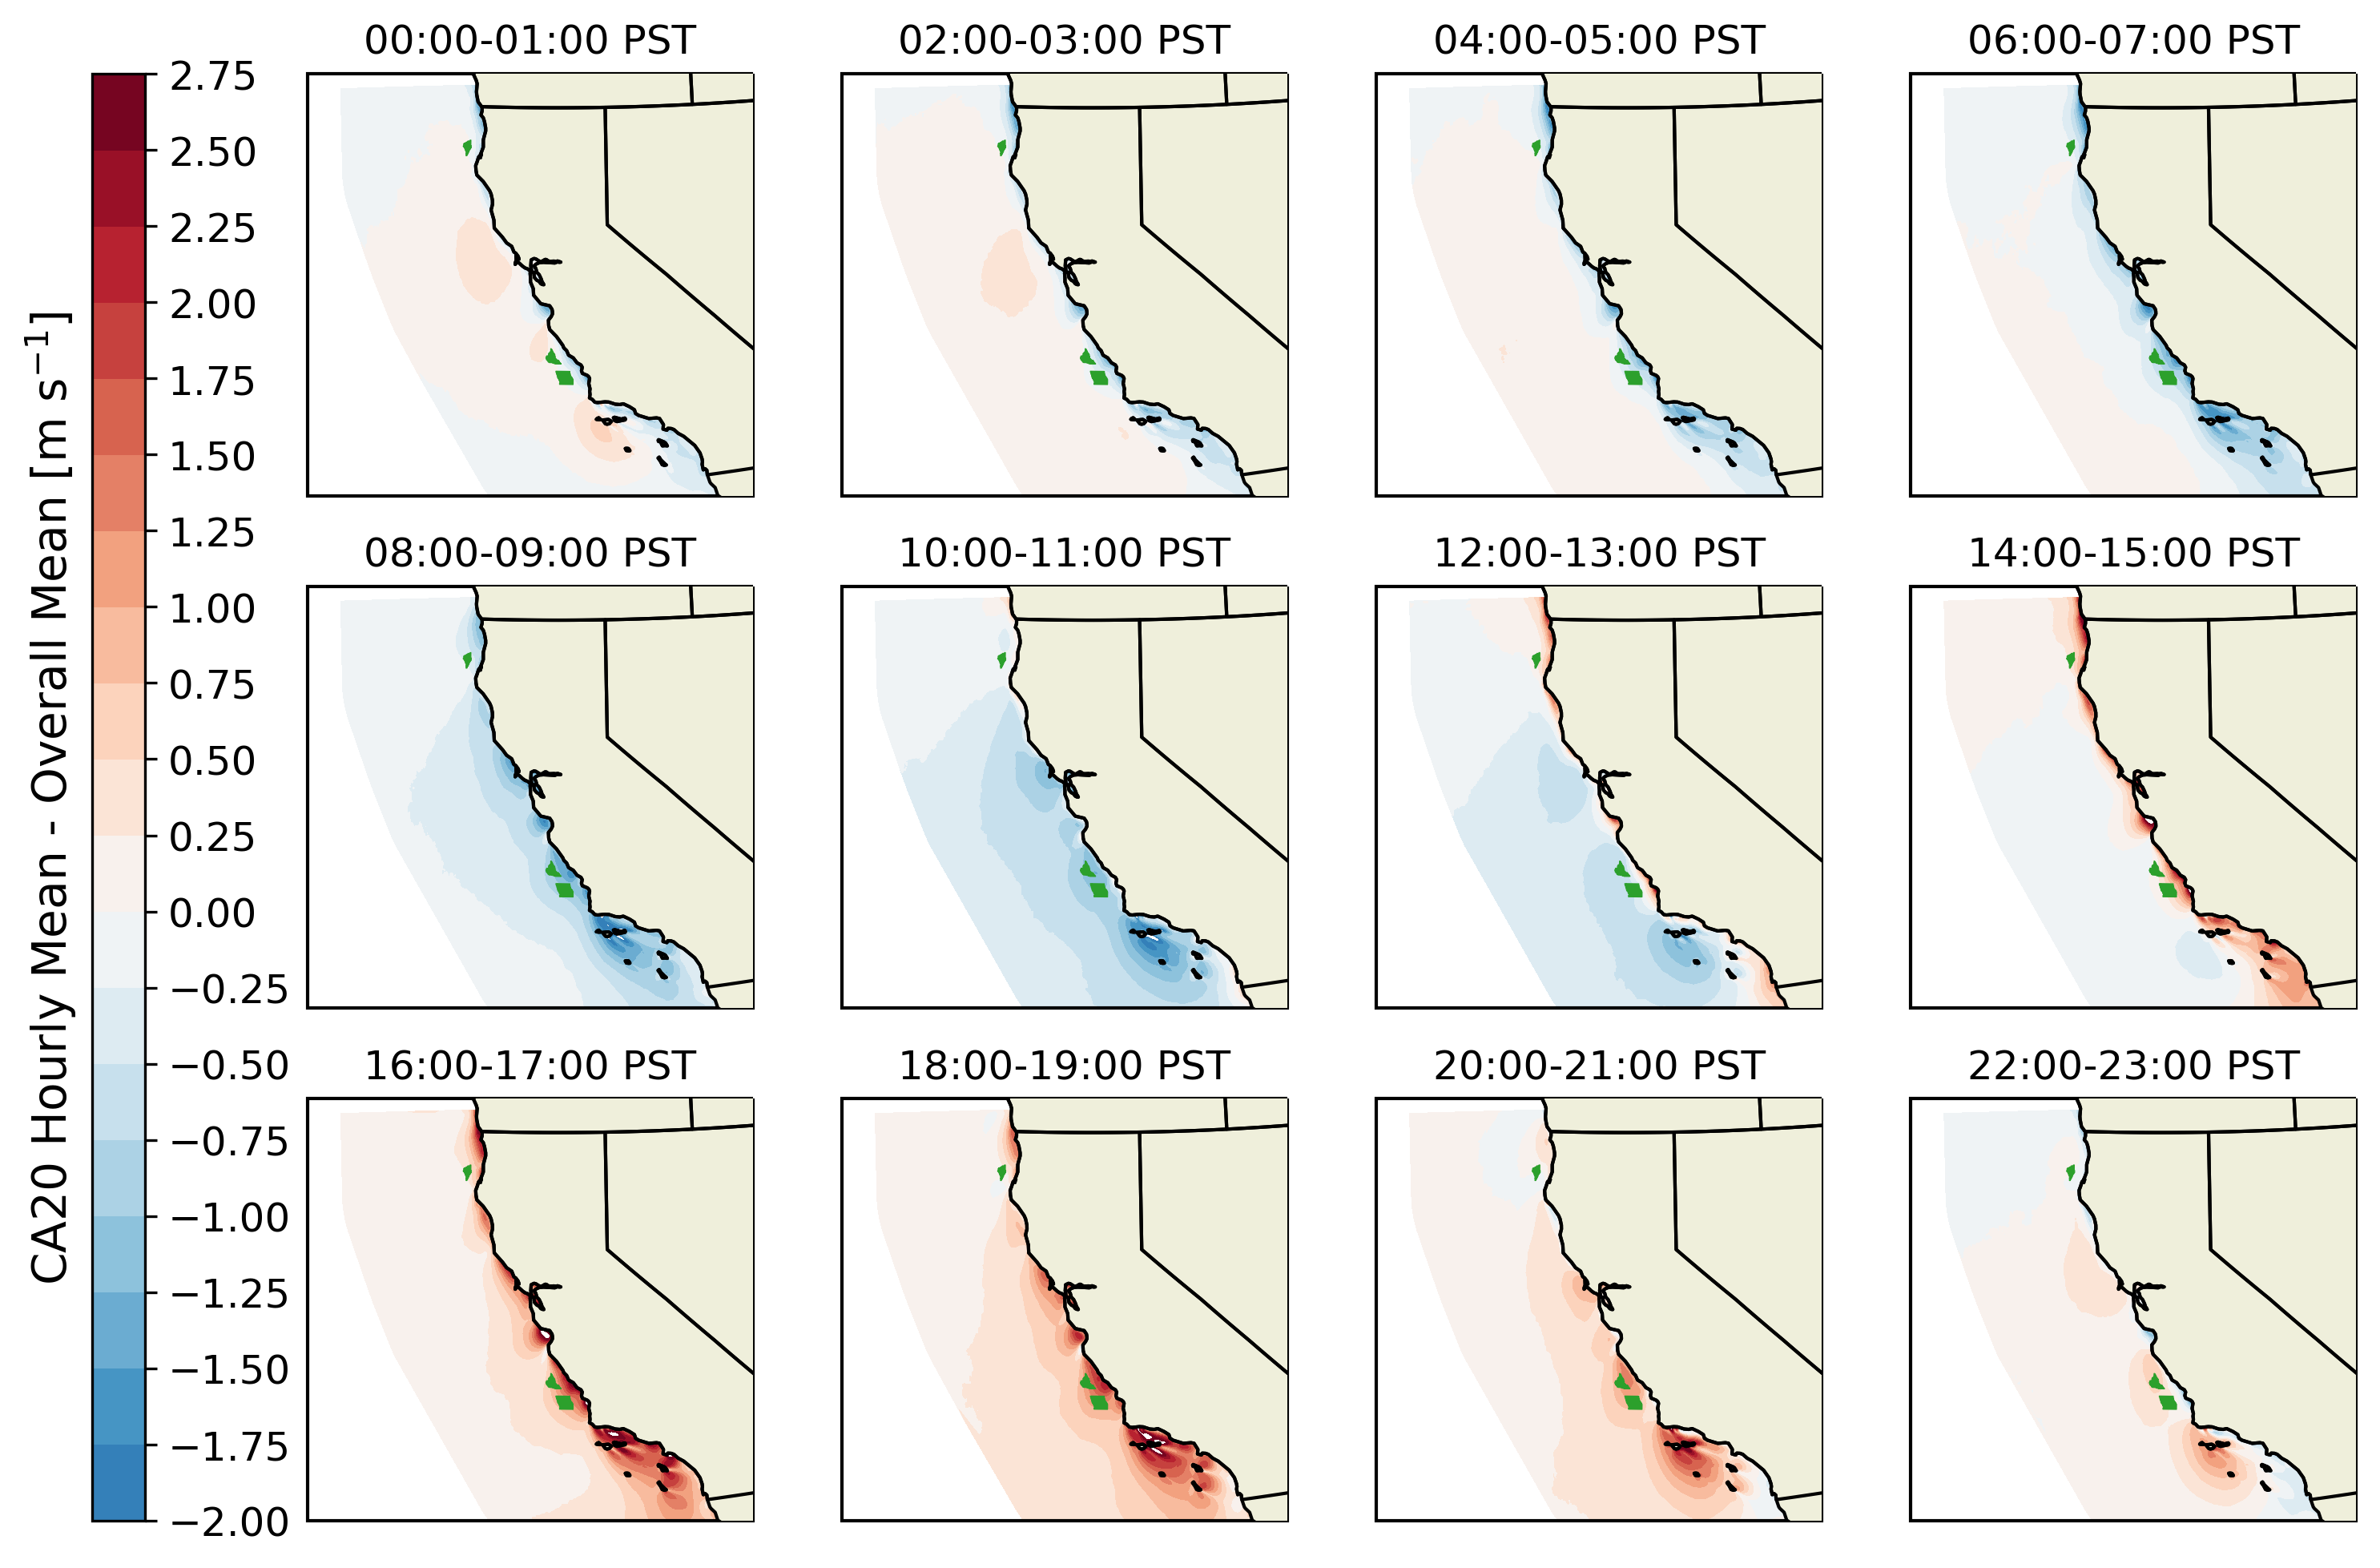

In [30]:
### Plot hourly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(3, 4, figsize=(11, 8), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-2.0, 2.75, 20)

im1 = ax[0,0].tricontourf(long_vec,
                        lat_vec,
                        boemh08-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,1].tricontourf(long_vec,
                        lat_vec,
                        boemh10-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,2].tricontourf(long_vec,
                        lat_vec,
                        boemh12-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,3].tricontourf(long_vec,
                        lat_vec,
                        boemh14-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,0].tricontourf(long_vec,
                        lat_vec,
                        boemh16-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,1].tricontourf(long_vec,
                        lat_vec,
                        boemh18-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,2].tricontourf(long_vec,
                        lat_vec,
                        boemh20-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,3].tricontourf(long_vec,
                        lat_vec,
                        boemh22-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,0].tricontourf(long_vec,
                        lat_vec,
                        boemh00-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,1].tricontourf(long_vec,
                        lat_vec,
                        boemh02-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,2].tricontourf(long_vec,
                        lat_vec,
                        boemh04-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,3].tricontourf(long_vec,
                        lat_vec,
                        boemh06-ca20_full,
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))


# Colorbar
cax = fig.add_axes([ax[-1,0].get_position().x1-0.25,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('CA20 Hourly Mean - Overall Mean [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("00:00-01:00 PST")
ax[0,1].set_title("02:00-03:00 PST")
ax[0,2].set_title("04:00-05:00 PST")
ax[0,3].set_title("06:00-07:00 PST")
ax[1,0].set_title("08:00-09:00 PST")
ax[1,1].set_title("10:00-11:00 PST")
ax[1,2].set_title("12:00-13:00 PST")
ax[1,3].set_title("14:00-15:00 PST")
ax[2,0].set_title("16:00-17:00 PST")
ax[2,1].set_title("18:00-19:00 PST")
ax[2,2].set_title("20:00-21:00 PST")
ax[2,3].set_title("22:00-23:00 PST")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig04.png', bbox_inches='tight')

plt.show()

/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
/Users/orybchuk/opt/anaconda3/envs/wfp/lib/python3.7/site-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNo

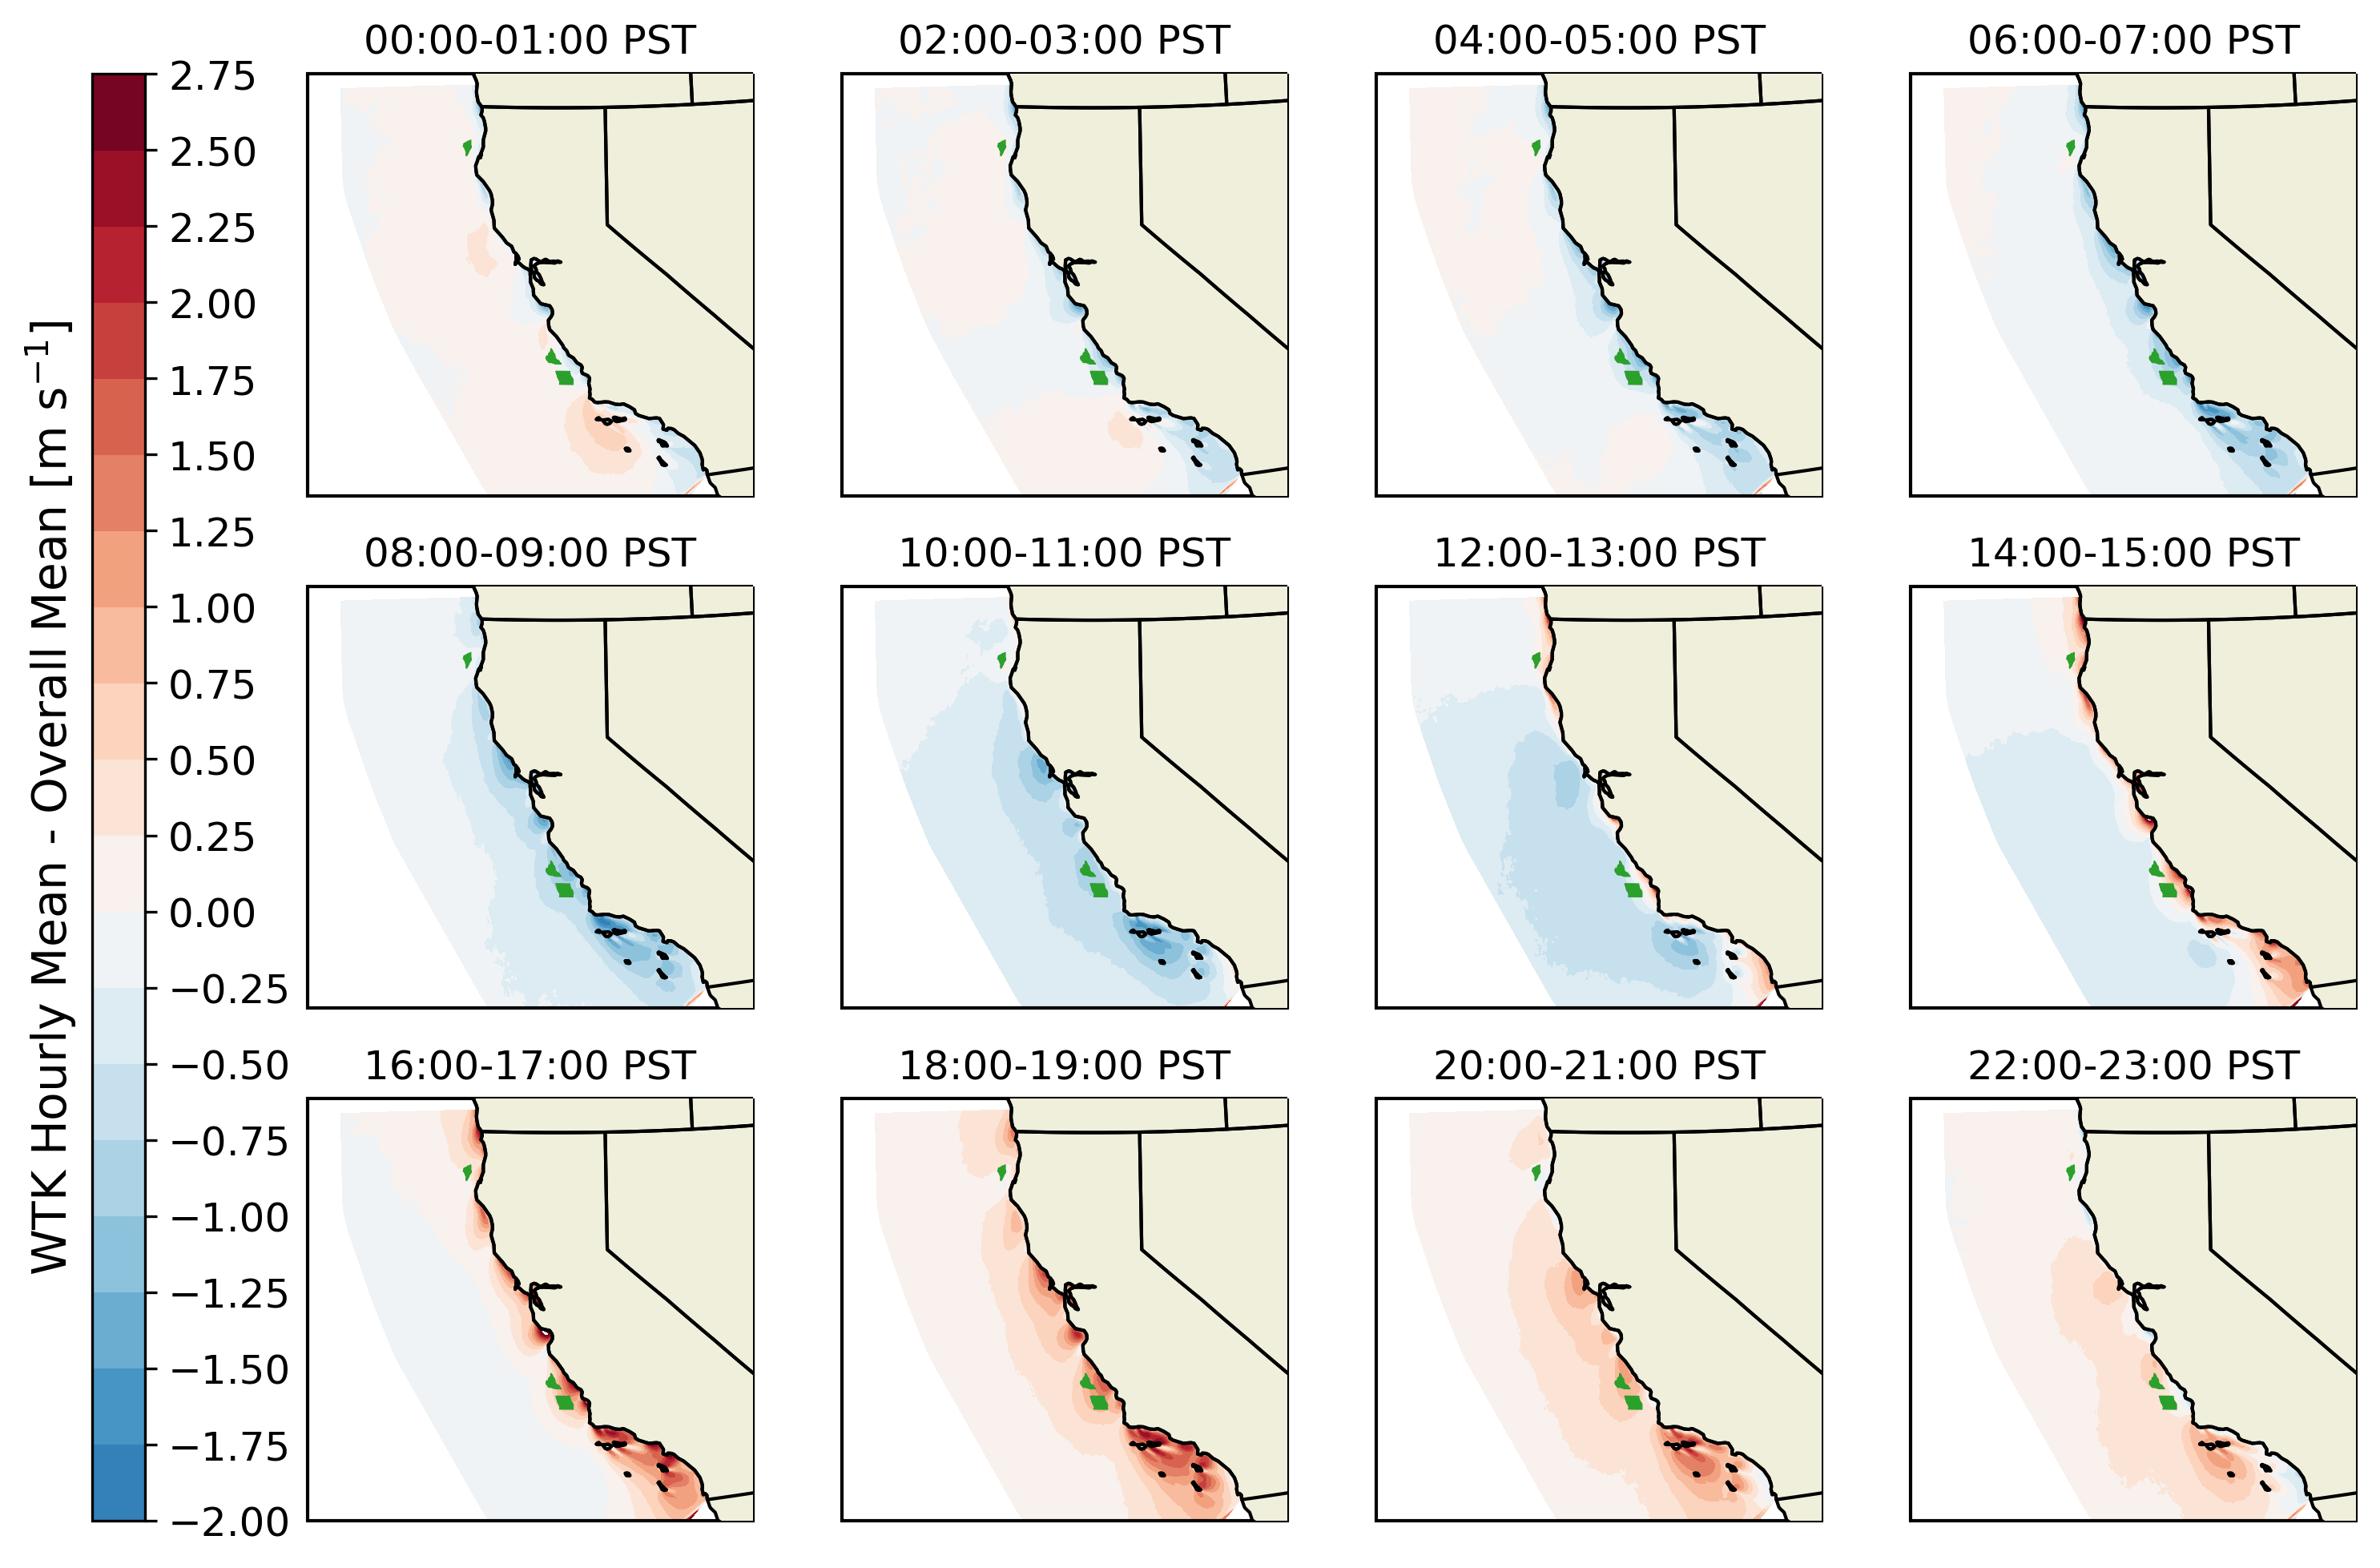

In [31]:
### Plot hourly difference maps
proj = ccrs.LambertConformal(central_longitude=LONG_MEAN, central_latitude=LAT_MEAN)
fig, ax = plt.subplots(3, 4, figsize=(11, 8), subplot_kw=dict(projection=proj),
                          sharex=True, sharey=True)

ax[0,0].set_extent(MAP_BOUNDS)

ticks_diff = np.linspace(-2.0, 2.75, 20)

diffh00 = wtkh00.copy()
diffh00['Winds'] = wtkh00['Winds']-wtk_full['Winds']
diffh00 = diffh00.dropna()

diffh02 = wtkh02.copy()
diffh02['Winds'] = wtkh02['Winds']-wtk_full['Winds']
diffh02 = diffh02.dropna()

diffh04 = wtkh04.copy()
diffh04['Winds'] = wtkh04['Winds']-wtk_full['Winds']
diffh04 = diffh04.dropna()

diffh06 = wtkh06.copy()
diffh06['Winds'] = wtkh06['Winds']-wtk_full['Winds']
diffh06 = diffh06.dropna()

diffh08 = wtkh08.copy()
diffh08['Winds'] = wtkh08['Winds']-wtk_full['Winds']
diffh08 = diffh08.dropna()

diffh10 = wtkh10.copy()
diffh10['Winds'] = wtkh10['Winds']-wtk_full['Winds']
diffh10 = diffh10.dropna()

diffh12 = wtkh12.copy()
diffh12['Winds'] = wtkh12['Winds']-wtk_full['Winds']
diffh12 = diffh12.dropna()

diffh14 = wtkh14.copy()
diffh14['Winds'] = wtkh14['Winds']-wtk_full['Winds']
diffh14 = diffh14.dropna()

diffh16 = wtkh16.copy()
diffh16['Winds'] = wtkh16['Winds']-wtk_full['Winds']
diffh16 = diffh16.dropna()

diffh18 = wtkh18.copy()
diffh18['Winds'] = wtkh18['Winds']-wtk_full['Winds']
diffh18 = diffh18.dropna()

diffh20 = wtkh20.copy()
diffh20['Winds'] = wtkh20['Winds']-wtk_full['Winds']
diffh20 = diffh20.dropna()

diffh22 = wtkh22.copy()
diffh22['Winds'] = wtkh22['Winds']-wtk_full['Winds']
diffh22 = diffh22.dropna()

im1 = ax[0,0].tricontourf(diffh08['Long'],
                        diffh08['Lat'],
                        diffh08['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,1].tricontourf(diffh10['Long'],
                        diffh10['Lat'],
                        diffh10['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,2].tricontourf(diffh12['Long'],
                        diffh12['Lat'],
                        diffh12['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[0,3].tricontourf(diffh14['Long'],
                        diffh14['Lat'],
                        diffh14['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,0].tricontourf(diffh16['Long'],
                        diffh16['Lat'],
                        diffh16['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,1].tricontourf(diffh18['Long'],
                        diffh18['Lat'],
                        diffh18['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,2].tricontourf(diffh20['Long'],
                        diffh20['Lat'],
                        diffh20['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[1,3].tricontourf(diffh22['Long'],
                        diffh22['Lat'],
                        diffh22['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,0].tricontourf(diffh00['Long'],
                        diffh00['Lat'],
                        diffh00['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,1].tricontourf(diffh02['Long'],
                        diffh02['Lat'],
                        diffh02['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,2].tricontourf(diffh04['Long'],
                        diffh04['Lat'],
                        diffh04['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))
im = ax[2,3].tricontourf(diffh06['Long'],
                        diffh06['Lat'],
                        diffh06['Winds'],
                        ticks_diff, transform=ccrs.Geodetic(),
                        cmap=plt.cm.RdBu_r, norm=DivergingNorm(0, vmin=-1*ticks_diff.max(), vmax=ticks_diff.max()))

# Colorbar
cax = fig.add_axes([ax[-1,0].get_position().x1-0.25,ax[-1,0].get_position().y0,0.02,ax[0,0].get_position().y1-ax[-1,0].get_position().y0])
cbar = fig.colorbar(im1, cax=cax, ticks=ticks_diff)
cbar.ax.tick_params(labelsize=12) 
cbar.set_label('WTK Hourly Mean - Overall Mean [m s$^{-1}$]', fontsize=14, labelpad=-80)

# Subtitles
ax[0,0].set_title("00:00-01:00 PST")
ax[0,1].set_title("02:00-03:00 PST")
ax[0,2].set_title("04:00-05:00 PST")
ax[0,3].set_title("06:00-07:00 PST")
ax[1,0].set_title("08:00-09:00 PST")
ax[1,1].set_title("10:00-11:00 PST")
ax[1,2].set_title("12:00-13:00 PST")
ax[1,3].set_title("14:00-15:00 PST")
ax[2,0].set_title("16:00-17:00 PST")
ax[2,1].set_title("18:00-19:00 PST")
ax[2,2].set_title("20:00-21:00 PST")
ax[2,3].set_title("22:00-23:00 PST")

## Add map features
# Land
ax[0,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[0,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[1,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,0].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,1].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,2].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')
ax[2,3].add_feature(land_50m, facecolor=cfeature.COLORS['land'], zorder=100, edgecolor='k')

# States
ax[0,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[0,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[1,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,0].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,1].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,2].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')
ax[2,3].add_feature(states_50m, facecolor='None', zorder=101, edgecolor='k')

ax[0,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[0,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[1,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,0].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,1].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,2].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)
ax[2,3].add_geometries(df_proj_group['geometry'], crs=crs, edgecolor='C2', facecolor='C2', linewidth=0.3)

# plt.savefig('../figures/fig21.png', bbox_inches='tight')

plt.show()